# Intro to NN (Feed-Forward NN) using Pytorch: 
    
    

## Basics of Pytorch: 

In [65]:

import torch
import torch.nn as nn
 
torch.manual_seed(31337)

In [66]:
# Creating Tensors: 

X_int = torch.tensor([1,2,3,4],dtype = torch.int) # 32 bit integer
X_float = torch.tensor([1,2,3,4],dtype = torch.float) # 32 bit float
X_bool = torch.tensor([0,1,1,0], dtype = torch.bool) # Boolean

print(X_int)
print(X_float)
print(X_bool)

tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([1., 2., 3., 4.])
tensor([False,  True,  True, False])


In [67]:
empty = torch.empty(3,5) # Empty array of shape (3, 5)
ran = torch.rand(4, 2) # 
zeros = torch.zeros(2,3,4) # Array of 0s of shape (2, 3, 4)
ones = torch.ones(6) # Array of 1s of shape (6,)

print('Empty tensor with shape {}: \n\n {}\n'.format(empty.shape, empty))
print('Random tensor with shape {}: \n\n {}\n'.format(ran.shape, ran))
print('Zeros tensor with shape {}: \n\n {}\n'.format(zeros.shape, zeros))
print('Ones tensor with shape {}: \n\n {}\n'.format(ones.shape, ones))

Empty tensor with shape torch.Size([3, 5]): 

 tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

Random tensor with shape torch.Size([4, 2]): 

 tensor([[0.7941, 0.4809],
        [0.4088, 0.4594],
        [0.9966, 0.4029],
        [0.8646, 0.1313]])

Zeros tensor with shape torch.Size([2, 3, 4]): 

 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Ones tensor with shape torch.Size([6]): 

 tensor([1., 1., 1., 1., 1., 1.])



An important keyword we can (and often need to) specify is `requires_grad`. The default value is `False`, but it *must* be set to `True` for any tensors that will be involved in the training process (more on this later). Including a gradient is why we *must* use PyTorch Tensors rather than just numpy arrays.

In [68]:
print(torch.tensor([8,9]).requires_grad)

False


<div style="background-color: #FFF8C6">

If your computer has a GPU, PyTorch has a function to check whether CUDA is available (which is important for GPU acceleration of neural network training, which you can read more about [here](https://pytorch.org/docs/master/notes/cuda.html)). There is a similar backend accelerator available for MacOS devices, using the Metal programming framework. You can read more about this [here](https://developer.apple.com/metal/pytorch/).

In [69]:
print(torch.cuda.is_available())
print(torch.backends.mps.is_available())

False
True


## Linear Layers

In PyTorch, the standard method to construct a neural network is using so-called **linear layers**, which we construct by specifying the number of inputs and the number of outputs for that layer. These are eseentially arrays of single neurons like we saw earlier; for a linear layer with $N$ inputs and $M$ outputs, we have $M$ individual neurons which each have $N$ weights, one for each of the $N$ inputs. We do this using `nn.Linear`. 

In [70]:
inputs = 2
outputs = 4

linear = nn.Linear(inputs, outputs) # Layer that takes in 2 inputs and produces 4 outputs

By defining a layer this way, it will generate random weights and biases for each neuron in the layer; in this case, we have one neuron with two inputs, so we should have two weights and one bias. We can manually inspect the weights and biases of a linear layer using `Linear.weight` and `Linear.bias` respectively:

In [71]:
print(linear.weight)
print(linear.bias)

Parameter containing:
tensor([[-0.5175,  0.3412],
        [ 0.6485, -0.2469],
        [-0.5959, -0.5769],
        [ 0.1997,  0.6662]], requires_grad=True)
Parameter containing:
tensor([-0.6531,  0.2900, -0.4022, -0.1757], requires_grad=True)


In [72]:
linear(torch.Tensor([8,9]))

tensor([ -1.7224,   3.2561, -10.3612,   7.4181], grad_fn=<ViewBackward0>)

This operation is also **vectorised**, so we can pass in an input with multiple samples, so long as we have 2 features for each sample. For example, let us generate a tensor with 10 samples, with 2 features each:

In [73]:
samples = torch.rand(10,2)
print('Shape of samples : {}'.format(samples.shape))

Shape of samples : torch.Size([10, 2])


When we pass this tensor through our layer, we will get 4 outputs for each sample.

In [74]:
# Example of this effect: 

print(samples)
print(linear(samples))

print(samples.shape)
print(linear(samples).shape)

tensor([[0.9304, 0.9804],
        [0.2917, 0.7499],
        [0.2006, 0.1586],
        [0.7494, 0.4234],
        [0.1743, 0.3772],
        [0.0278, 0.6044],
        [0.4025, 0.2893],
        [0.9979, 0.7851],
        [0.6455, 0.4131],
        [0.4192, 0.5552]])
tensor([[-0.8001,  0.6513, -1.5222,  0.6633],
        [-0.5482,  0.2940, -1.0086,  0.3821],
        [-0.7028,  0.3809, -0.6133, -0.0300],
        [-0.8964,  0.6714, -1.0930,  0.2560],
        [-0.6146,  0.3098, -0.7236,  0.1104],
        [-0.4613,  0.1588, -0.7674,  0.2325],
        [-0.7627,  0.4796, -0.8090,  0.0974],
        [-0.9016,  0.7433, -1.4498,  0.5466],
        [-0.8461,  0.6066, -1.0252,  0.2284],
        [-0.6806,  0.4247, -0.9723,  0.2779]], grad_fn=<AddmmBackward0>)
torch.Size([10, 2])
torch.Size([10, 4])


## Activation functions

Of course, we know that without non-linearities we can only approximate linear functions with our network. We must add non-linear activation functions in order to be able to tackle non-linear problems. 

There are plenty of activation functions implemented in `torch.nn`, which you can read about in detail in the [documentation](https://pytorch.org/docs/stable/nn.html#non-linear-activations-weighted-sum-nonlinearity). A couple common choices include:

* `nn.Sigmoid`
<br>

* `nn.ReLU`
<br>

Like the linear layers, activation functions on PyTorch are objects that can be called on inputs to apply the function to that data. In the cell below, we will define a `Sigmoid` activation function (which is continuous between 0 and 1).



In [75]:
activation = nn.Sigmoid()
print('Activation on output of a single layer: {}'.format(activation(linear(torch.Tensor([8,9])))))

Activation on output of a single layer: tensor([1.5157e-01, 9.6289e-01, 3.1635e-05, 9.9940e-01],
       grad_fn=<SigmoidBackward0>)


Like our linear layers, activation functions can be applied on multiple samples as they are vectorised objects:

In [76]:
print(activation(linear(samples)))

tensor([[0.3100, 0.6573, 0.1791, 0.6600],
        [0.3663, 0.5730, 0.2673, 0.5944],
        [0.3312, 0.5941, 0.3513, 0.4925],
        [0.2898, 0.6618, 0.2511, 0.5637],
        [0.3510, 0.5768, 0.3266, 0.5276],
        [0.3867, 0.5396, 0.3170, 0.5579],
        [0.3181, 0.6176, 0.3081, 0.5243],
        [0.2887, 0.6777, 0.1900, 0.6333],
        [0.3002, 0.6472, 0.2640, 0.5569],
        [0.3361, 0.6046, 0.2744, 0.5690]], grad_fn=<SigmoidBackward0>)


# MultiLayer Models in Pytorch:

We can assemble multiple layers together using `nn.Sequential`, by passing a list of layers. In the code cell below, we will construct a model with 2 input features, one hidden layer with 10 neurons with a sigmoid activation, and 1 output. `nn.Sequential` is similar to the `Pipeline` objects we saw in scikit-learn back in Week 6; the output of the previous object is passed to the next.

In [77]:
model = nn.Sequential(nn.Linear(2, 10),
                      nn.Sigmoid(),
                      nn.Linear(10,1))

In [78]:
print('Model prediction for single sample: {}\n'.format(model(torch.Tensor([2,3]))))

print('Model prediction for multiple samples: {}'.format(model(samples)))

Model prediction for single sample: tensor([-0.3089], grad_fn=<ViewBackward0>)

Model prediction for multiple samples: tensor([[-0.3005],
        [-0.3191],
        [-0.3133],
        [-0.2947],
        [-0.3178],
        [-0.3268],
        [-0.3066],
        [-0.2933],
        [-0.2988],
        [-0.3108]], grad_fn=<AddmmBackward0>)


<div style="background-color: #FFF8C6">


As well as using `nn.Sequential`, we can define neural networks in PyTorch by subclassing the `nn.Module` class. This allows us to customise our network behaviour more, such as customising what happens when we call `model(tensor)` e.g. in case we want to pass inputs to multiple networks simultaneously, which is important for many state-of-the-art neural networks. You can read more about this approach in the [documentation](https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html).

<div style="background-color:#C2F5DD">

## Example

Using `nn.Sequential`, define a neural network with 2 inputs, 30 hidden neurons (in a single layer), and one output. Use a ReLU activation function after the hidden layer, and a sigmoid activation at the end of the network.

In [79]:
model_eg = nn.Sequential(nn.Linear(2,30),
                         nn.ReLU(),
                         nn.Linear(30,1),
                         nn.Sigmoid())

display(model_eg)

Sequential(
  (0): Linear(in_features=2, out_features=30, bias=True)
  (1): ReLU()
  (2): Linear(in_features=30, out_features=1, bias=True)
  (3): Sigmoid()
)

## Datasets and DataLoaders

PyTorch implements two useful structures for managing data that we use to train a neural network, called **Datasets** and **DataLoaders**. These work as follows:

* A Dataset collects inputs and targets together, so indexing a Dataset gives you an input-target pair
<br>

* A DataLoader is an iterable object that "wraps" access to a Dataset, allowing for easy access to data, especially in batches (which is important for stochastic gradient descent). 

A DataLoader requires us to pass it a Dataset object so it can access pairs of inputs and targets. It also has a lot of other useful features, including:

* Automatic shuffling of data to randomize the order in which data is shown to the network during training (helps prevent minimisation getting stuck in a local minimum)
<br>

* Efficient parallelization of data loading across CPU cores or GPUs
<br>

You can read more about data processing methods in PyTorch in the [documentation](https://pytorch.org/docs/stable/data.html).

We will use `TensorDataset` to define our dataset, and then define a `DataLoader`. There are a number of different types of Dataset that you can read about in the [documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).

<div style="background-color: #FFF8C6">

You can also create custom `Dataset` classes, if you have additional functionality you want that isn't included in one of the base types. 

In [80]:
from torch.utils.data import TensorDataset, random_split

X_torch = torch.randn(200, 2)
y_torch = torch.randn(200,1)

dataset = TensorDataset(X_torch, y_torch)
dataset_train, dataset_test = random_split(dataset, lengths = [0.8,0.2]) # Split dataset into separate datasets for training & testing

When we define a DataLoader, we need to choose the size of the batches we want to pass through our network i.e. how many training samples we use at a time. This is controlled by the `batch_size` parameter.

In [81]:
from torch.utils.data import DataLoader

dloader_train = DataLoader(dataset_train, batch_size = 32, shuffle = True)
dloader_test = DataLoader(dataset_test, batch_size = 32, shuffle = True)

<div style="background-color: #FFF8C6">

It is generally good to keep `batch_size` as a power of 2, because this leads to faster calculations when training.

We can iterate over `DataLoader` to obtain each batch in turn:

In [82]:
for X_batch, y_batch in dloader_train:
    print("X_batch : \n {}".format(X_batch))
    print("y_batch : \n {}".format(y_batch))
    

X_batch : 
 tensor([[-0.1828,  1.1512],
        [ 0.3069,  0.1060],
        [-0.2886, -2.3078],
        [ 0.5314,  1.8977],
        [ 0.7163,  1.9786],
        [ 0.0583,  0.1696],
        [-0.3562, -0.1962],
        [ 1.1674, -1.0165],
        [ 0.9580, -0.7805],
        [ 1.3234,  0.7262],
        [ 0.3778, -1.1839],
        [ 0.2905, -0.8957],
        [-0.3899,  1.2502],
        [-2.0960,  0.1872],
        [-0.1154, -0.4249],
        [ 0.2473,  0.7545],
        [ 0.0704, -1.3044],
        [-0.4436,  3.1055],
        [ 0.6711,  0.0349],
        [-0.4662, -2.0973],
        [ 0.3191,  0.7979],
        [ 0.9136, -0.9420],
        [-0.3011, -0.2788],
        [-1.0633,  2.2008],
        [-0.0434, -1.6963],
        [-0.3577, -0.0648],
        [ 0.1874,  1.9118],
        [ 0.6036, -0.1630],
        [-0.1464,  0.9840],
        [-0.4188, -0.8432],
        [-1.1584, -1.2297],
        [ 0.8869, -1.4295]])
y_batch : 
 tensor([[ 0.9181],
        [-0.0031],
        [-2.3939],
        [ 0.8289],
   

## Training, validation, and test datasets

Before we start training a network, we also need to prepare our data appropriately. Previously, we have separated our data into training and test data, where we use the test data to test how well the model can generalise to unseen data. 

In the case of neural networks, however, we want to go one step further and split into train, validation, and test datasets. These are each used as follows:

* Training dataset: used to train the model.
<br>

* Validation data: used during training to monitor generalisation of the network. Want to ensure loss on validation data improves as well as the training data; if validation loss stops improving while training loss continues to improve, this is a sign of overfitting.
<br>

* Test data: used after *all* training is finished to evaluate final performance. Should not be used to change your training, only after you have finished any hyperparameter optimisation. If you train more models after using the test data, you should collect more test data for future final testing.

## Training a NN using Pytorch: 

### Reminder of fundamental process to training a NN: 

The overall procedure for training our model in a single epoch therefore goes as follows: <a id='algorithm'></a>

1. Obtain a single batch of our data
<br>

1. Perform a forward pass, i.e. calculate prediction on the training data in the batch
<br>

1. Zero the gradients on our optimizer in preparation for calculating gradients of the batch
<br>

1. Calculate the loss from the prediction and the batch training targets
<br>

1. Perform a backward pass i.e. calculate the gradients of the loss function with respect to each model parameter
<br>

1. Use the gradients to perform a step of the optimizer and update the model parameters
<br>

1. Repeat the process for the next batch until all batches have been used to update the model parameters



**Important Note about Stochastic Gradient Descent (I.e. training in batches)**

<div style="background-color:#FFCCCB">

When working with standard gradient descent, we update a parameter $p$ according to the following equation each epoch of the training (i.e. each iteration of the whole training dataset):

\begin{equation*}
p = p - \alpha \frac{\partial L}{\partial p}(\mathbf{X}, \mathbf{y}),
\end{equation*}
where $\alpha$ denotes the learning rate, $L$ is the loss function, and $\mathbf{X}$ and $\mathbf{y}$ denote *all* of our training inputs and targets respectively.

In contrast, when we work with stochastic gradient descent, we split our training dataset into $N$ random subsets $\{(\mathbf{X}_1, \mathbf{y}_1), (\mathbf{X}_2, \mathbf{y}_1), \cdots, (\mathbf{X}_N, \mathbf{y}_N)\}$, where we can specify either the number of subsets we want or the number of points per subset. 

The update equation for parameters then follows

\begin{align*}
&\text{for batch in }\{(\mathbf{X}_1, \mathbf{y}_1), (\mathbf{X}_2, \mathbf{y}_1), \cdots, (\mathbf{X}_N, \mathbf{y}_N)\}: \\
&\qquad p = p - \frac{\alpha}{N_\text{batch}}\sum_{\text{sample} \in \text{batch}} \frac{\partial L}{\partial p}(\mathbf{X}_\text{sample}, y_\text{sample}),
\end{align*}
where $N_\text{batch}$ is the number of training points in the batch, $\mathbf{X}_\text{sample}$ and $y_\text{sample}$ denote a single input and target in the batch, and the sum is over all points in the batch. In each epoch we re-select our batches randomly so we are not biasing the training of the network to specific samples.

## Choice of activation functions

Now we understand how a neural network learns, we can talk in more detail about how we can chose components of our network to best optimise it for training and for specific problems. In particular, we will discuss some particular problems that can occur depending on our choice of activation function.

Consider a very deep neural network, for example with 50 layers of neurons. As we backpropagate to calculate loss function gradients, we collect an additional $\frac{\partial \phi(z)}{\partial z}$ term with every layer we move back through the network. As a result, if we have extremes in our activation function gradient then we can end up updating our parameters either far too slowly or far too quickly. 

* **Vanishing gradient problem**: if the expectation of the activation function gradient is considerably smaller than 1, for parameters far from the output $\frac{\partial L}{\partial p}$ will become extremely close to 0, resulting in very small steps every update. Results in slow or stalled learning. 
<br>

* **Exploding gradient problem**: if the expectation of the activation function gradient is much greater than one, $\frac{\partial L}{\partial p}$ will be very large for layers far from the output, so can cause wild fluctuations in the weights with every update by overshooting the minimum. This makes it difficult for the model to train effectively. 

Activation functions such as sigmoid and tanh are explicitly bad for deep neural networks because of these reasons. 

To avoid this, we need to choose activation functions with gradients that won't be too big or too small. In general, a good choice for a deep network is a variant on the Rectified Linear Unit (ReLU), with such variants including:

* LeakyReLU: allows a non-zero gradient for $z \lt 0$, whereas ReLU is 0 for negative $z$. Has a parameter $\alpha$. 

\begin{equation*}
\text{LeakyReLU}(z) = \begin{cases}
  z  & z \geq 0 \\
  \alpha\cdot z & \text{otherwise}
\end{cases}
\end{equation*}

* Exponential Linear Unit (ELU): uses an exponential function for negative $z$. Has a parameter $\alpha$.

\begin{equation*}
\text{ELU}(z) = \begin{cases}
z & z \gt 0 \\
\alpha\cdot (e^{z} - 1) & \text{otherwise}
\end{cases}
\end{equation*}

* Swish: the most recently proposed of these and was designed to find an "optimal" activation function (you can see the paper [here](https://arxiv.org/abs/1710.05941)), to help solve an issue with ReLU known as **dead neurons**. This is the product of the input and the sigmoid of the input.

\begin{equation*}
\text{Swish}(z) = \frac{z}{1 + e^{-z}}
\end{equation*}





<div style="background-color: #FFF8C6">

## Dead neurons

A known drawback of the ReLU activation is the occurrence of so-called **dead neurons**. This neurons have *no* gradient, or a *very* small gradient, for any training input. For ReLU, the gradient can only be zero (or very small) if the input is less than 0, as for inputs greater than 0 ReLU has a constant gradient of 1. 

A neural network trains by calculating the gradient of the loss function with respect to each layer's parameters. If the gradient calculated when backpropagating is close to 0, the associated parameters will update very slowly (or not at all). This can cause the training to slow or to stall completely. 

For a neural network with many neurons, it is not unlikely that this will occur. In fact, in general we find that the number of dead neurons increases with the depth of the layer. This is in general not too great an issue if there is only a small number of dead neurons. As weights are updated in the training process, previously dead neurons can become "alive" again as the inputs to the layers change with the model parameters. 

However, dead neurons in the input layer are particularly problematic. Because the training data (the input to the layer) is fixed, as the network trains the inputs to that layer cannot change. As a result, neurons in the input layer that are dead *cannot* become alive again. This motivates the use of ReLU-alternative activation functions with more useful gradient properties, particularly for negative inputs. 

## Regularisation
    
When we train a deep neural network, because we are fitting many parameters to our data, it can be very easy to overfit on our training data. As we have discussed previously, we need **regularisation** techniques to tackle overfitting and ensure we still have good performance on unseen data i.e. that our model generalises well. There are a number of ways we can do this with a neural network:
    
* Early stopping:
    <br>
    
* Loss function regularisation terms
    <br>
    
* Dropout layers

## Training a NN in pytorch (Example): 

In [83]:
from sklearn.datasets import make_classification
import numpy as np

n_samples = 300
np.random.seed(42)

X, y = make_classification(n_features = 2, n_redundant = 0, n_samples = n_samples, n_informative = 2, random_state = 6, class_sep = 1, n_clusters_per_class=1)

X_torch = torch.tensor(X).float()
y_torch = torch.tensor(y).float()

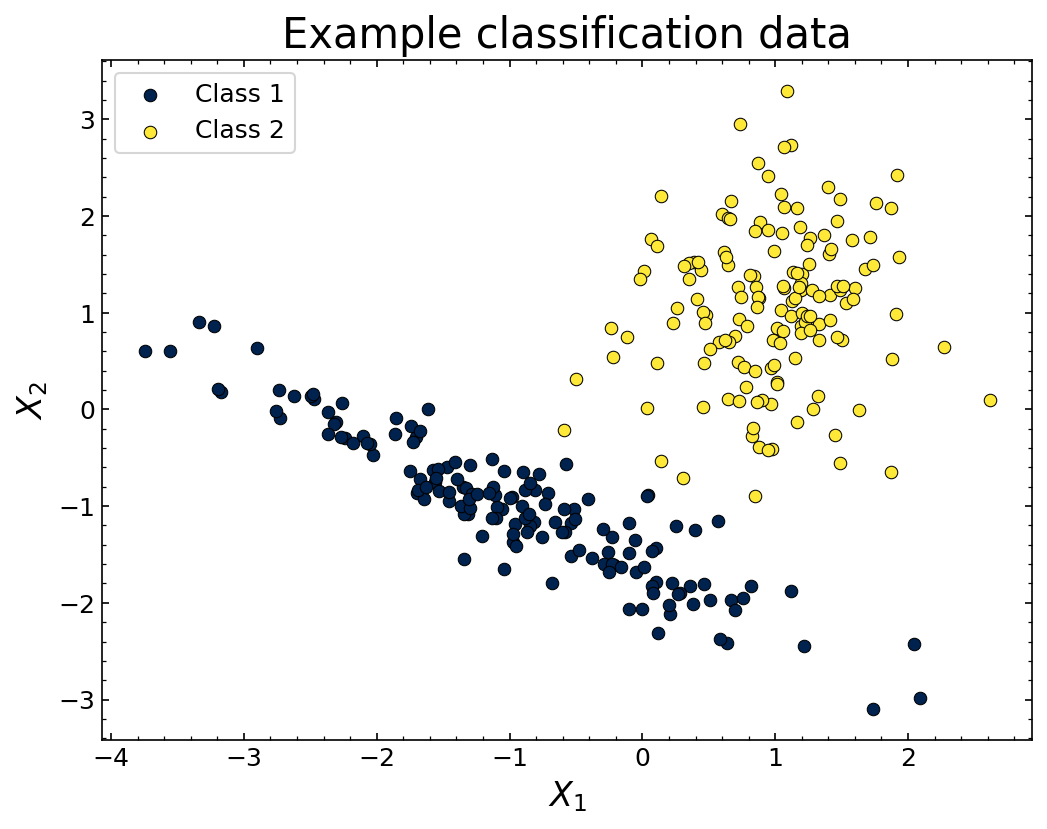

In [84]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import matplotlib.cm as cm

fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
ax.scatter(X[:,0][y==0],X[:,1][y==0], color = '#00224E', label='Class 1', edgecolor='black', lw = 0.5)
ax.scatter(X[:,0][y==1],X[:,1][y==1], color = '#FEE838', label='Class 2', edgecolor='black', lw = 0.5)
# ax.scatter(X[:,0], X[:,1], c = y, cmap = cm.cividis)
ax.set_xlabel('$X_1$',fontsize = 16)
ax.set_ylabel('$X_2$',fontsize = 16)
ax.tick_params(which='both',top=True,right=True,direction='in',labelsize = 12)
ax.xaxis.set_minor_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.2))
ax.set_title('Example classification data',fontsize = 20)
ax.legend(loc='upper left',fontsize = 12)


In [85]:
torch.manual_seed(5)

model = nn.Sequential(nn.Linear(2,10),
                      nn.ReLU(),
                      nn.Linear(10,1),
                      nn.Sigmoid())

In [86]:
dataset = TensorDataset(X_torch, y_torch)
dataset_train, dataset_validate, dataset_test = random_split(dataset, lengths = [0.6,0.2,0.2], generator = torch.Generator().manual_seed(2)) # Split dataset into separate datasets for training & testing

dloader_train = DataLoader(dataset_train, batch_size = 32, shuffle = True)
dloader_validate = DataLoader(dataset_validate, batch_size = 32, shuffle = True)



### Loss Functions: 

PyTorch implements a large number of common loss functions for both classification and regression, which you can read about in more detail in the [documentation](https://pytorch.org/docs/stable/nn.html#loss-functions). For this classification problem, we will use the binary cross entropy, which is implemented as `BCELoss`. You can read more about this in the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss) for `BCELoss`.

In [87]:
loss_fcn = nn.BCELoss()

We also need to define what **optimizer** we are going to use. This is a PyTorch object in `torch.optim` that defines what the algorithm used to optimise the loss function is, i.e. how we use our loss function gradients to update the parameters of the model. Each algorithm has different parameters, which are therefore hyperparameters of the neural network. In this example, we will use **stochastic gradient descent**, a modification of the standard gradient descent algorithm that can take batches of data at a time. This is implemented in PyTorch as `SGD`. 

When we initialise an optimizer, we must point it at the parameters of the model we are going to train, and specify any parameters of the optimizer we have chosen. In this case, we will specify the learning rate (as we have previously seen in regular gradient descent) using the `lr` argument, which we will set to 0.01. 

In [88]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

Two other useful parameters of `SGD` are `weight_decay` and `momentum`

In [89]:
def train_epoch():
    tot_loss = 0
    valid_loss = 0
    for X_train, y_train in dloader_train:
        y_pred = model(X_train)
        optimizer.zero_grad()
        loss = loss_fcn(y_pred, y_train.reshape(-1,1))
        tot_loss += loss.detach()
        loss.backward()
        optimizer.step()
    
    for X_valid, y_valid in dloader_validate:
        y_pred_v = model(X_valid)
        vloss = loss_fcn(y_pred_v, y_valid.reshape(-1,1))
        valid_loss += vloss.detach()
    
    return tot_loss/len(dataset_train), valid_loss/len(dataset_validate)


### Explanation of important lines in above: 

`optimizer.zero_grad()`: Clears the gradients of all model parameters. Ensures no accumulation of gradients from previous batches.

`loss = loss_fcn(y_pred, y_train.reshape(-1,1))`: The y_train.reshape(-1,1) reshapes the target to match the expected shape of the loss function

`tot_loss += loss.detach()`: Adds the current batch loss to `tot_loss`. `.detach()` ensures the loss is removed from the computational graph to prevent unnecessary gradient computation during accumulation.

`loss.backward()`: Computes the gradients of the loss with respect to the model parameters using backpropagation.

`optimizer.step()`: Updates the model parameters using the gradients and the optimizer's algorithm (e.g., SGD, Adam).



In detail, this function:

1. Gets a batch of inputs & targets, `X_train` and `y_train` respectively
<br>

1. Calculates the prediction `y_pred` of the model on the batch input `X_train`
<br>

1. Zeros the gradients in the network
<br>

1. Calculates the value of the loss function for this batch and adds it to the total loss
<br>

1. Calculates the gradients using `loss.backward()` (i.e. the backward pass)
<br>

1. Uses the gradients to 'step' the optimizer and updates the model parameters using `optimizer.step()`

After iterating over all batches, the function returns the total loss for that epoch. 

<div style="background-color: #FFF8C6">

One thing we need to be careful of is in the definition of our loss function: there is a parameter called `reduction` that determines how the loss values are combined in a single batch, as each individual sample has its own loss value. The default value in PyTorch is `mean`, but in this function we are finding the total loss, so we should make sure we define our loss function with `reduction = sum`, or multiply the loss prediction in a given batch by the size of the batch before we sum it with the other losses. For ease, we will redefine the loss function.

In [90]:
loss_fcn = nn.BCELoss(reduction='sum')

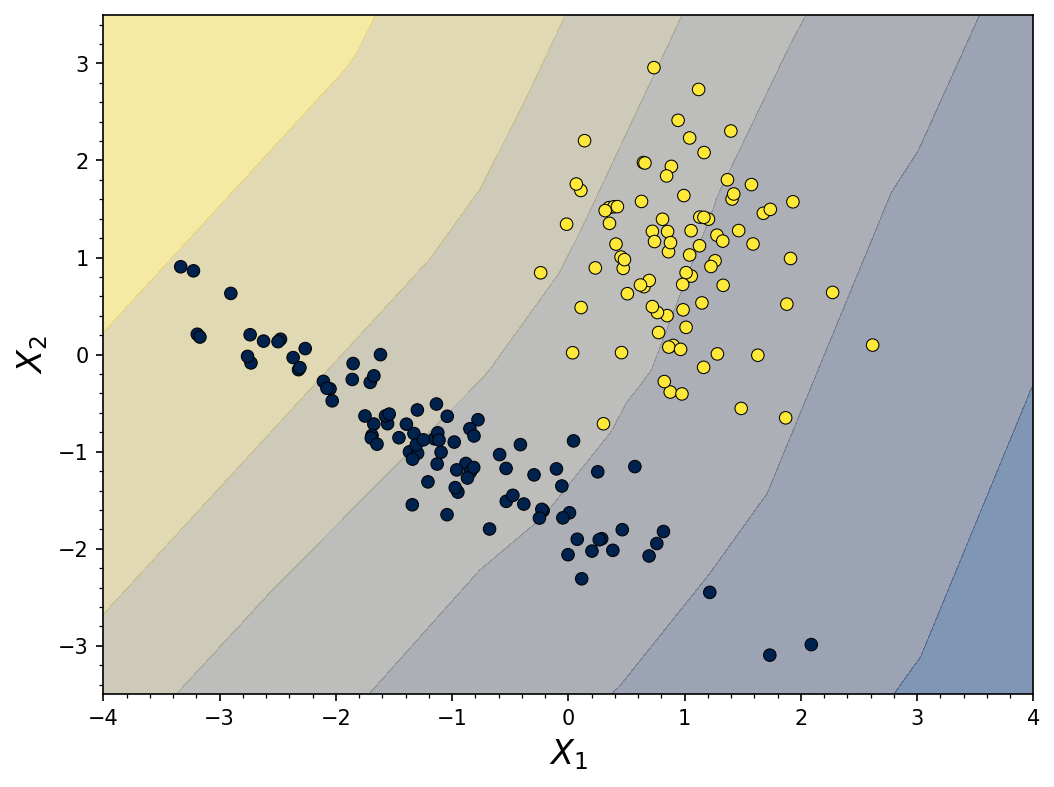

In [91]:
X_train = torch.vstack([dataset_train[i][0] for i in range(len(dataset_train))])
y_train = torch.vstack([dataset_train[i][1] for i in range(len(dataset_train))])
X_valid = torch.vstack([dataset_validate[i][0] for i in range(len(dataset_validate))])
y_valid = torch.vstack([dataset_validate[i][1] for i in range(len(dataset_validate))])


def plot_decision_boundary(ax, scatter_x, scatter_y):
    N = 1000
    X_grid = np.meshgrid(np.linspace(-7,7,N),np.linspace(-7,7,N))
    X_grid2 = np.array([X_grid[0].flatten(),X_grid[1].flatten()])
    preds = model(torch.tensor(X_grid2.transpose()).float()).reshape((N, N)).detach()
    ax.contourf(X_grid[0],X_grid[1], preds, cmap = plt.cm.cividis, alpha = 0.5)
    ax.scatter(scatter_x[:,0],scatter_x[:,1],c = scatter_y, cmap = plt.cm.cividis, edgecolor='black',lw = 0.5)
    ax.set_xlabel('$X_1$',fontsize = 16)
    ax.set_ylabel('$X_2$',fontsize = 16)
    ax.set_xlim(-4, 4)
    ax.set_ylim(-3.5,3.5)
    ax.xaxis.set_minor_locator(MultipleLocator(0.2))
    ax.xaxis.set_major_locator(MultipleLocator(1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.2))

fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
plot_decision_boundary(ax, X_train, y_train)


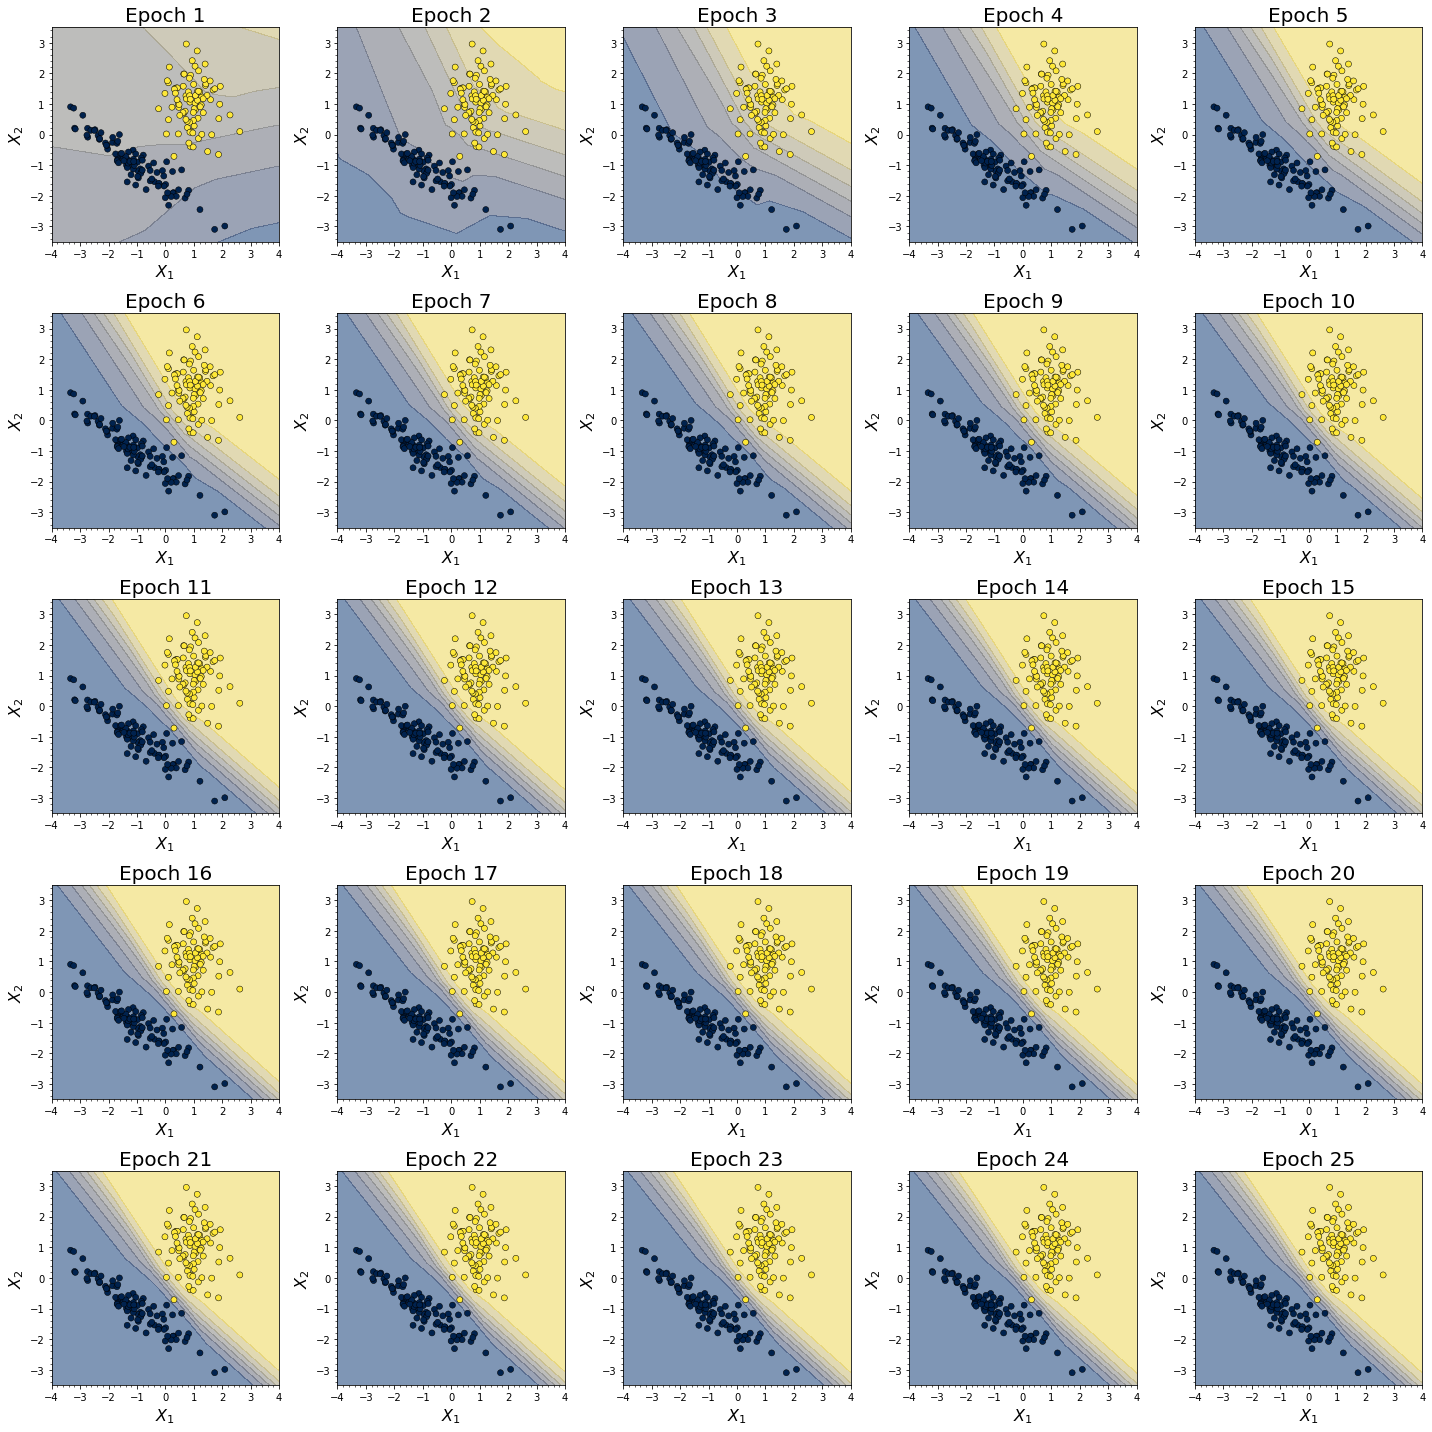

In [92]:
# training for 25 epochs: 

fig, ax = plt.subplots(5,5,figsize = (20,20))

t_loss, v_loss = [],[]
for i in range(25):
    train_loss,valid_loss = train_epoch()
    t_loss.append(train_loss)
    v_loss.append(valid_loss)
    plot_decision_boundary(ax[int(i/5), i%5], X_train, y_train)
    ax[int(i/5),i%5].set_title('Epoch {}'.format(i+1),fontsize = 20)

fig.tight_layout()

Text(0.5, 1.0, 'Validation data')

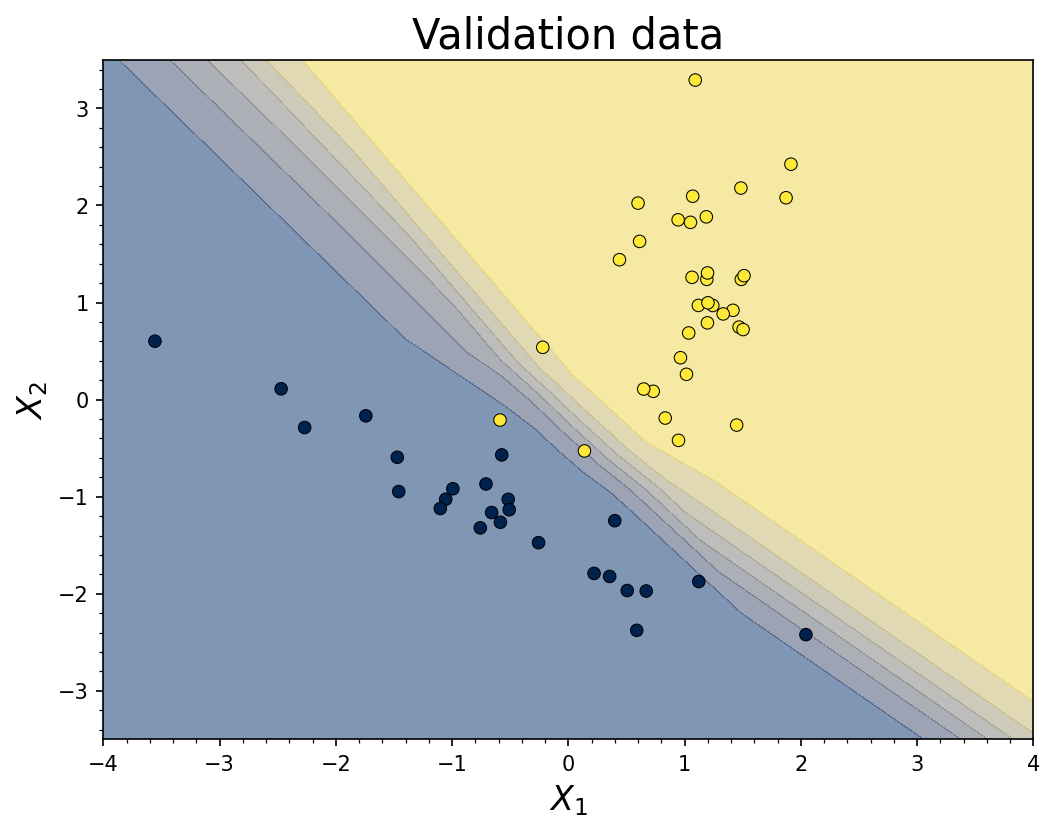

In [93]:
fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
plot_decision_boundary(ax, X_valid, y_valid)
ax.set_title('Validation data',fontsize = 20)

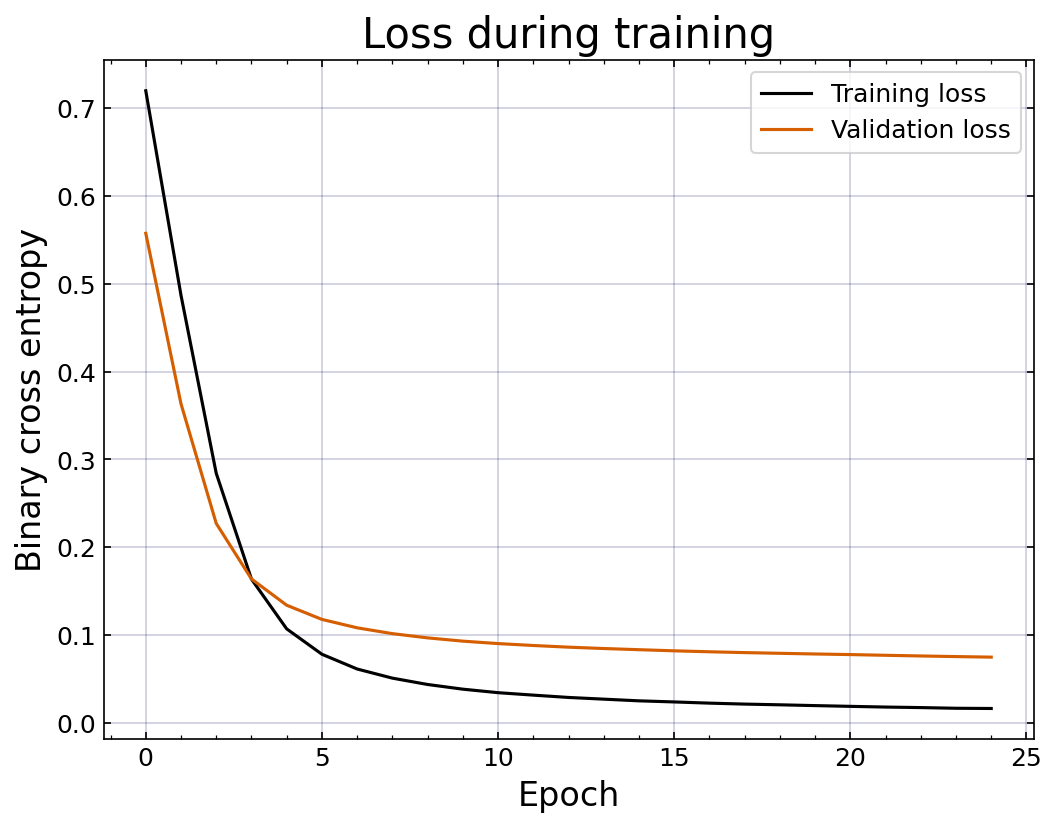

In [94]:
fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)

ax.plot(t_loss, color='black',label='Training loss')
ax.plot(v_loss, color='#D55E00',label='Validation loss')
ax.set_xlabel('Epoch',fontsize = 16)
ax.set_ylabel('Binary cross entropy',fontsize = 16)
ax.set_title('Loss during training',fontsize = 20)
ax.tick_params(labelsize =12, which = 'both',top=True, right = True, direction='in')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(4))
ax.grid(color='xkcd:dark blue',alpha = 0.2)
ax.legend(loc='upper right',fontsize = 12)

### Classification Accuracy: 

In [95]:
# Need to decide what class to predict, and make sure the prediction tensor is in the right shape
train_pred = torch.Tensor([0 if x < 0.5 else 1 for x in model(X_train)]).reshape(y_train.shape)
train_accuracy = (train_pred==y_train).sum()/len(train_pred)

valid_pred = torch.Tensor([0 if x < 0.5 else 1 for x in model(X_valid)]).reshape(y_valid.shape)
valid_accuracy = (valid_pred==y_valid).sum()/len(valid_pred)

print('Training accuracy = {:.1f}%'.format(train_accuracy*100))
print('Validation accuracy = {:.1f}%'.format(valid_accuracy*100))

Training accuracy = 99.4%
Validation accuracy = 96.7%


ROC score = 0.998


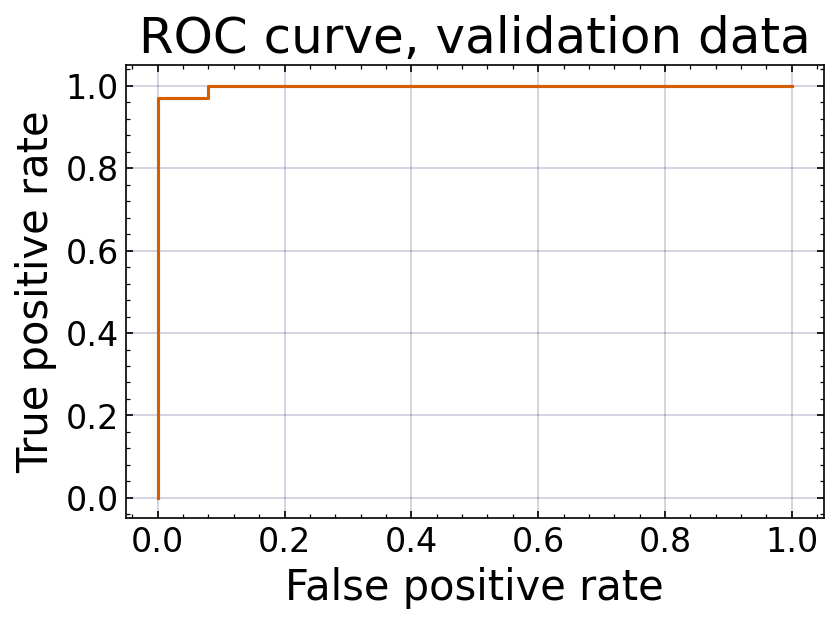

In [96]:
from sklearn.metrics import roc_curve, roc_auc_score

roc_score = roc_auc_score(y_valid.detach().numpy(), model(X_valid).detach().numpy())

fpr, tpr, thresholds = roc_curve(y_valid.detach().numpy(), model(X_valid).detach().numpy())

fig, ax = plt.subplots(1,1,figsize = (6, 4), dpi = 150)
ax.plot(fpr, tpr, color='#D55E00')
ax.set_xlabel('False positive rate',fontsize = 20)
ax.set_ylabel('True positive rate',fontsize = 20)
ax.set_title('ROC curve, validation data',fontsize = 24)
ax.xaxis.set_minor_locator(MultipleLocator(0.04))
ax.yaxis.set_minor_locator(MultipleLocator(0.04))
ax.tick_params(which='both',direction='in',top=True,right=True,labelsize = 16)
ax.grid(color='xkcd:dark blue',alpha = 0.2)

print('ROC score = {:.3f}'.format(roc_score))

# training a NN on FashionMnist: 

In [97]:
import torchvision
from torchvision.datasets import FashionMNIST
from torchvision import transforms

In [98]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,))])

train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transform)

In [99]:
print(test_dataset)

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )


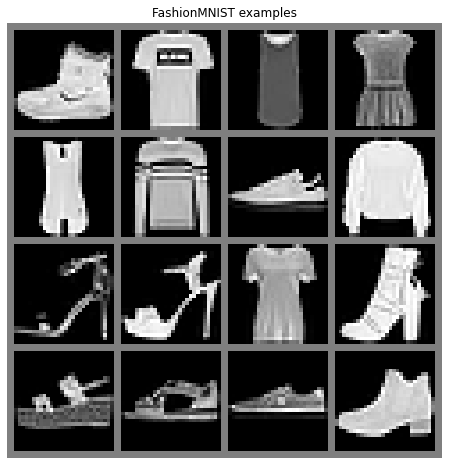

In [100]:
exmp_imgs = [train_dataset[i][0] for i in range(16)]
# Organize the images into a grid for nicer visualization
img_grid = torchvision.utils.make_grid(torch.stack(exmp_imgs, dim=0), nrow=4, normalize=True, pad_value=0.5)
img_grid = img_grid.permute(1, 2, 0)

plt.figure(figsize=(8,8))
plt.title("FashionMNIST examples")
plt.imshow(img_grid)
plt.axis('off')
plt.show()
plt.close()

In [101]:
# Define Training and Validation Datasets: 

dataset_train, dataset_validate = random_split(train_dataset, lengths = [50000, 10000], generator = torch.Generator().manual_seed(2))

In [102]:
# Define DataLoaders:

train_dloader = DataLoader(dataset_train, batch_size = 256, shuffle = True, drop_last = True)
valid_dloader = DataLoader(dataset_validate, batch_size = 256, shuffle = True)

In [103]:
model = nn.Sequential(nn.Linear(784, 512),
                      nn.ReLU(),
                      nn.Linear(512,256),
                      nn.ReLU(),
                      nn.Linear(256,256),
                      nn.ReLU(),
                      nn.Linear(256,128),
                      nn.ReLU(),
                      nn.Linear(128,10),
                      nn.Sigmoid()
                     )




In [104]:
loss_fcn = nn.CrossEntropyLoss()

In [105]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

In [106]:
def train_epoch():
    tot_loss = 0
    valid_loss = 0
    for X_train, y_train in train_dloader:
        # Flatten X_train     
        X_train = X_train.view(X_train.size(0), -1)  # Flatten to [batch_size, 784]
          
        y_pred = model(X_train)
        optimizer.zero_grad()
        
        loss = loss_fcn(y_pred, y_train)
        tot_loss += loss.detach()
        loss.backward()
        optimizer.step()
    
    for X_valid, y_valid in valid_dloader:
        X_valid = X_valid.view(X_valid.size(0), -1)
        y_pred_v = model(X_valid)
        vloss = loss_fcn(y_pred_v, y_valid)
        valid_loss += vloss.detach()
    
    return tot_loss/len(dataset_train), valid_loss/len(dataset_validate)

In [107]:
t_loss, v_loss = [],[]
for i in range(5):
    train_loss,valid_loss = train_epoch()
    t_loss.append(train_loss.item())
    v_loss.append(valid_loss.item())
    

# outputs a terrible model but still framework for training is above: 


# California Housing Dataset: 



In [108]:
# Load California Housing

from sklearn.datasets import fetch_california_housing

cf_housing = fetch_california_housing(as_frame = False)

X = cf_housing.data
y = cf_housing.target

In [109]:

num_samples, num_features = X.shape

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, random_split


In [110]:
def create_model(neurons_per_layer, activation_functions):
    
    layers = []
    
    if activation_functions[0] is not None: 
        layers.append(activations_functions[0]())
        
    else: 
        for i in range(len(neurons_per_layer) - 1): 
            layers.append(nn.Linear(neurons_per_layer[i], neurons_per_layer[i + 1]))
            # Insert activation function between layers (except for the last layer)
            if i < len(activation_functions) - 1 and activation_functions[i+1] is not None:
                layers.append(activation_functions[i+1]())
        
    return nn.Sequential(*layers)
        
  

**Can avoid unpacking operator (*) by using the below**

```python
def create_model(neurons_per_layer, activation_functions):
    model = nn.Sequential()  # Create an empty Sequential container
    
    for i in range(len(neurons_per_layer) - 1):
        # Add a linear layer
        model.add_module(f"linear_{i}", nn.Linear(neurons_per_layer[i], neurons_per_layer[i + 1]))
        
        # Add an activation function if specified (except for the last layer)
        if i < len(activation_functions) and activation_functions[i] is not None:
            model.add_module(f"activation_{i}", activation_functions[i]())
    
    return model
```

In [111]:

neurons1 = [8, 40, 120, 40, 1]
neurons2 = [8, 120, 240, 40, 1]

activation_funcs1 = [None, nn.ReLU, nn.ReLU, nn.ReLU, None]
activation_funcs2 = [None, nn.ReLU, nn.ReLU, nn.ReLU, nn.LeakyReLU]

cf_model1 = create_model(neurons_per_layer=neurons1, 
                                           activation_functions=activation_funcs1)
cf_model2 = create_model(neurons_per_layer=neurons2, 
                                           activation_functions=activation_funcs2)

In [112]:
X_torch = torch.tensor(X).float()
y_torch = torch.tensor(y).float()

In [113]:
print('cf model 1: /n',cf_model1 )
print('cf model 2: /n',cf_model2 )

cf model 1: /n Sequential(
  (0): Linear(in_features=8, out_features=40, bias=True)
  (1): ReLU()
  (2): Linear(in_features=40, out_features=120, bias=True)
  (3): ReLU()
  (4): Linear(in_features=120, out_features=40, bias=True)
  (5): ReLU()
  (6): Linear(in_features=40, out_features=1, bias=True)
)
cf model 2: /n Sequential(
  (0): Linear(in_features=8, out_features=120, bias=True)
  (1): ReLU()
  (2): Linear(in_features=120, out_features=240, bias=True)
  (3): ReLU()
  (4): Linear(in_features=240, out_features=40, bias=True)
  (5): ReLU()
  (6): Linear(in_features=40, out_features=1, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
)


In [114]:
dataset = TensorDataset(X_torch, y_torch)
dataset_train, dataset_validate, dataset_test = random_split(dataset, lengths=[0.6, 0.2, 0.2], generator=torch.Generator().manual_seed(2))  # Split dataset into separate datasets for training & testing

train_dloader = DataLoader(dataset_train, batch_size=256, shuffle=True, drop_last=True)
valid_dloader = DataLoader(dataset_validate, batch_size=256, shuffle=True)

In [115]:
loss_fcn = nn.MSELoss(reduction='sum')

optimizer_cf1 = torch.optim.SGD(cf_model1.parameters(), lr = 0.01)
optimizer_cf2 = torch.optim.SGD(cf_model2.parameters(), lr = 0.01)

In [116]:
def train_epoch(model, optimizer, epoch):
    train_loss, val_loss = 0, 0
    model.train()
    
    for X_train, y_train in train_dloader:
        
        y_pred = model(X_train)
        optimizer.zero_grad()
        loss = loss_fcn(y_pred, y_train.reshape(-1,1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        
    model.eval()
    
    for X_valid, y_valid in valid_dloader:
        with torch.no_grad():
            
            y_pred_v = model(X_valid)
            vloss = loss_fcn(y_pred_v, y_valid.reshape(-1,1))
            val_loss += vloss.item()
            
    return train_loss/len(dataset_train), val_loss/len(dataset_validate)



In [117]:
# Define scaler
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from tqdm import tqdm

scaler = MinMaxScaler()

def train_epoch(model, optimizer, epoch):
    train_loss, val_loss = 0, 0
    model.train()
    for X_train, y_train in tqdm(train_dloader,desc=f"Epoch {epoch+1}", leave=False):
        X_train = torch.from_numpy(scaler.fit_transform(X_train)).to(torch.float)
        y_pred = model(X_train)
        optimizer.zero_grad()
        loss = loss_fcn(y_pred, y_train.reshape(-1,1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    model.eval()
    for X_valid, y_valid in valid_dloader:
        with torch.no_grad():
            X_valid = torch.from_numpy(scaler.fit_transform(X_valid)).to(torch.float)
            y_pred_v = model(X_valid)
            vloss = loss_fcn(y_pred_v, y_valid.reshape(-1,1))
            val_loss += vloss.item()
            
    return train_loss/len(dataset_train), val_loss/len(dataset_validate)

In [118]:

train_loss = []
val_loss = []

for i in range(50): 
    tloss, vloss = train_epoch(cf_model1, optimizer_cf1, i)
    train_loss.append(tloss)
    val_loss.append(vloss)
    

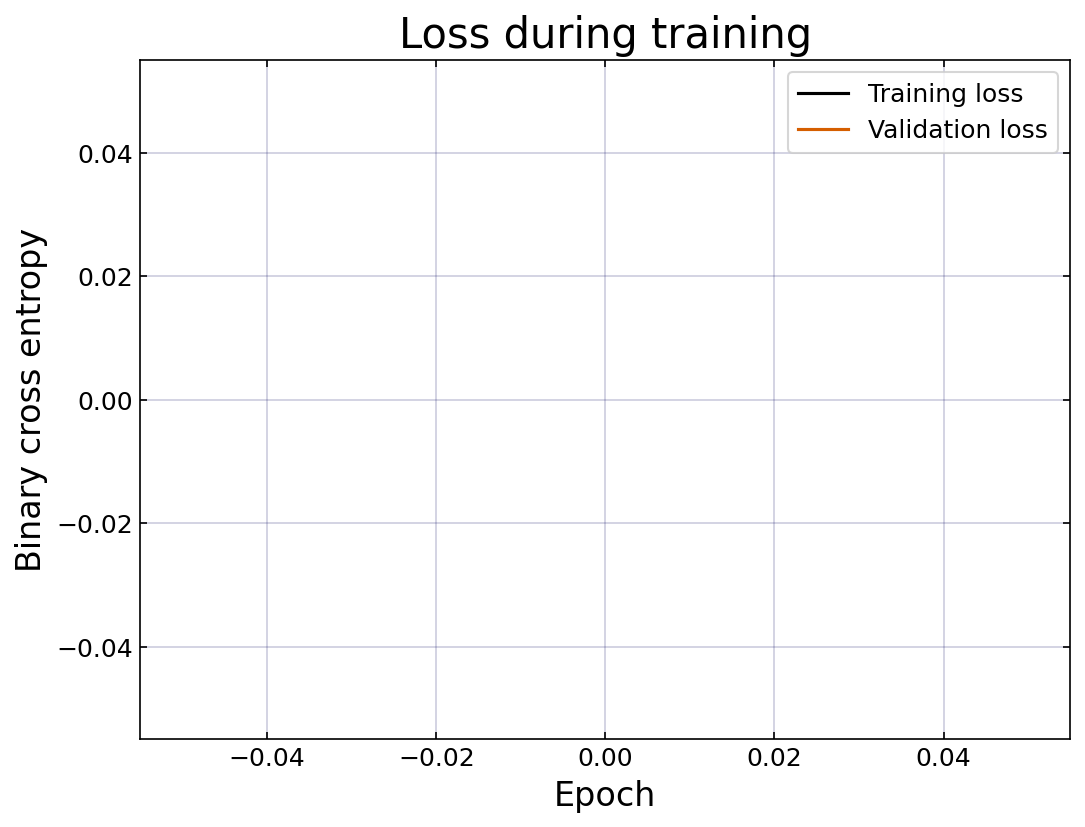

In [119]:
fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)

ax.plot(train_loss, color='black',label='Training loss')
ax.plot(val_loss, color='#D55E00',label='Validation loss')
ax.set_xlabel('Epoch',fontsize = 16)
ax.set_ylabel('Binary cross entropy',fontsize = 16)
ax.set_title('Loss during training',fontsize = 20)
ax.tick_params(labelsize =12, which = 'both',top=True, right = True, direction='in')
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(4))
ax.grid(color='xkcd:dark blue',alpha = 0.2)
ax.legend(loc='upper right',fontsize = 12)

# Convolutional Neural Networks: 

<div style="background-color:#FFCCCB">

A convolution between two functions produces a third function that expresses how the shape of one of the functions is modified by the other. The convolution of two functions $f$ and $g$ can be written as 

\begin{equation*}
(f * g)(t) = \int_{-\infty}^\infty f(t - \tau) g(\tau) d\tau,
\end{equation*}
where $\tau$ is a dummy variable introduced for the integration. We can see this as "sliding" the function $f(t - \tau)$ over the function $g(t)$ as we vary $\tau$ in the integration. 

If instead our functions $f$ and $g$ are functions of discrete variables, we can write this expression as a sum instead of an integral:

\begin{equation*}
(f * g)(t) = \sum_{\tau = -\infty}^\infty f(t - \tau) g(\tau)
\end{equation*}

When we apply convolutions in convolutional neural networks, we refer to the function $g(\tau)$ as the input, and the function $f(t - \tau)$ as the **kernel**. The output function $(f * g)(t)$ can be referred to as the **feature map**. Typically, our input is some multidimensional array of data (for example, a colour image with 3 colour channels corresponding to red, green and blue) and the kernel is some multidimensional array of parameters which are learned in the training process. 

Because our inputs are in general finite numerical arrays, we can instead of taking the sum to $-\infty$ and $\infty$ we can instead sum over a finite number of array elements. We also often use convolutions over more than one axis at a time. For example, for a two-dimensional image $I$ as the input and a two-dimensional kernel $K$, we can write the convolution as

\begin{equation*}
S(i, j) = (I * K)(i, j) = \sum_m \sum_n I(m, n) K(i - m, j - n)
\end{equation*}

To put it simply when we apply a kernel of size $N \times M$:

* We take all of the pixels in an $N \times M$ grid around a point in the image and performs a weighted sum, where the kernel contains the weights we use
<br>

* Then, move the kernel one pixel over and take another weighted sum (with the same weights) of the new set of pixels. 
<br>

* You repeat this process for the whole image 

The resulting array is called the feature map and effectively encodes relationships between pixels that are close together, depending on the parameters in the kernel. 

**Gif of how a kernel works below:** 

<img src='conv.gif' align='center' width = 600>

We can also illustrate a convolutional neural network with a schematic of layers with different volumes. Each layer has a height and a width, based on the height and width of an image. We also can have multiple channels in a layer (or our input). In the input this often corresponds to RGB channels in an image, but in our feature maps this can correspond to specific features extracted. We can use multiple kernels in a given layer to produce more channels in our feature map.

<img src='cnn_depth_schematic.png' width=600>

*Schematic illustrating the action of convolutional layers. Each convolutional layer decreases the height and width but increases the number of channels, and the feature map is converted to an output with a single fully connected linear layer at the end.*

# Features of Convolutional Layers:

Convolutional layers learn from data by changing the parameters kept in the kernel. This results in a few key features for this type of network:

1. Translational invariance
2. Re-use of parameters

### Translational invariance

If we train a standard neural network on an image dataset, the neurons in individual layers learn to respond to specific pixels in the image. For example, consider an neural network to identify where a dog is in an image. If we just train it with pictures of dogs in the lower right of the image, as soon as we present a data point with the dog in e.g. the upper left, the model will perform poorly.

In contrast, because for a convolutional neural network the weights are all stored in the kernel, you do not learn on specific pixels and instead extract relationships between adjacent pixels. This means you can pick up individual patterns regardless of where they are in the input, meaning your network response has translational invariance. 

For example, say we have a kernel that is good at locating a dog in an image. Because all the weights are in the kernel, if we shift the location of a dog in an image all we do is shift the corresponding output by the same amount. We will be equally good at detecting the dog regardless of where it is in the image.

### Re-use of parameters

Consider a $m \times n$ linear layer. All $m$ input values are connected to all $n$ output values, resulting in an array of weights you have to learn that is $m \times n$ in size. 

In contrast, for a convolutional network, the weights array we learn in a given layer is just the size of the kernel; e.g. for a kernel of shape $i \times j$, even if we have $m \gt i,\, j$ inputs, we only have to learn $i \times j$ parameters for that kernel. This greatly reduces the number of  weights we have to learn, to get the same sized input/output. We *only* have to learn the parameters in the kernel.

## Controlling the size of CNNs

While up to this point we have just discussed how CNNs are more effective that traditional neural networks for computer vision, we do need to be aware of the size of our CNNs. After we apply a given kernel, depending on the size of the kernel and the size of the input, we can get an output of the same size or smaller than our input. We can also increase the size relative to the input, by using more than one kernel. 

Typically, if there are more specific features we want to try to extract, we will use more kernels. For example, there are two different kernels for extracting vertical and horizontal edges from an image we saw earlier called the [Sobel operators](https://en.wikipedia.org/wiki/Sobel_operator). However, the more kernels we use, the more output neurons we end up with after our convolutional layer. 

If we are using multiple kernels every layer, we can quickly end up with much deeper layers and many more neurons than we started with, but when we come to make our final prediction we need to reduce our size down to what our output needs to be, e.g. a single number of we are predicting a single class or a single regression value. There are three main ways we can do this:

1. Have a linear, fully-connected layer at the end of our network
<br>

1. Increase the **stride**
<br>

1. Use **pooling**

The first of these results in many parameters that need to be trained, exactly what we wanted to avoid! So in general we won't do this. Instead, we make use of stride and pooling.


### Stride

The stride of a convolutional layer refers to how many pixels we move our kernel across our input when we pass through a convolutional layer. If we increase the stride, we move by more pixels between applications of the convolutional kernel; e.g. if we have a stride of N, we will do one convolution, then move our kernel by N pixels before we do another convolution. This is illustrated in the animation below.

<img src='stride.gif' width=1000>

*Illustration of the effect of setting stride > 1 for a convolution. Whereas on the left we have a stride of 1 and produce an output that is 5 x 5 from the 6 x 6 input, on the right with a stride of 2 we instead produce a 3 x 3 output. We can therefore use stride to reduce the size of the output from our layer. $X_i$ denotes the $i$th input, $w_j$ denotes the $j$th weight in the kernel, and $o_k$ denotes the $k$th output from the convolutional layer.*

However, it is important to note that when using stride we can lose information; for example, we can miss connections between two adjacent pixels if they are not covered by the kernel in a single step. In our example animation, any connection between $X_1$ and $X_2$ will be missed with our stride = 2 kernel. We do therefore need to be careful with when we use stride.

# CNNs in Pytorch:

CNNs are well supported in PyTorch and we can add relevant layers to our existing `nn.Sequential` blocks, including convolutional, padding, and pooling layers. We will look at each of these in turn. 

There are a number of convolutional layer options in PyTorch, but the most common we will use is [`nn.Conv2d`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d). This applies a 2D convolution over an input with multiple channels. You can specify the number of input channels, the number of output channels, and the size of the kernel, as well as the stride of the convolution and if you want any padding of the input. There are other options too, that you can see in the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html#torch.nn.Conv2d). 

We will illustrate a convolutional layer with a couple specific kernels, and apply it to an image to illustrate the effect of having multiple kernels. 

(-0.5, 299.5, 137.5, -0.5)

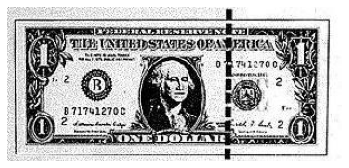

In [120]:
from PIL import Image
import matplotlib.pyplot as plt

# Load and visualise the image
img = Image.open('dollar_image.jpg')

plt.imshow(img)
plt.axis('off')

In [121]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# print(transform(img))
# print(transform(img).shape)

# conv_layer = nn.Conv2d()

We can see that our transform has converted our image into a PyTorch tensor, which has 3 channels and is a 138 by 300 image. We will now define a 2D convolutional layer with two different kernels, which are the Sobel operators. We will apply this layer to our image and then visualise the output. We will use a padding of 1 to keep our output the same size.

In [122]:
conv_layer = nn.Conv2d(3, 2, kernel_size = 3, padding = 1)

In [123]:
sobel_horizontal = torch.tensor([[-1.,0.,1.],
                                 [-2., 0., 2.],
                                 [-1., 0., 1.]])

sobel_vertical = sobel_horizontal.T

# Need to replicate kernel for each channel
sobel_horizontal = sobel_horizontal.view(1, 1, 3, 3).repeat(1, 3, 1, 1) 
sobel_vertical = sobel_vertical.view(1, 1, 3, 3).repeat(1, 3, 1, 1)

weights = torch.concat([sobel_horizontal, sobel_vertical], axis = 0)

conv_layer.weight = nn.Parameter(weights)

In [124]:
feature_map = conv_layer(transform(img))

print(feature_map.shape)

torch.Size([2, 138, 300])


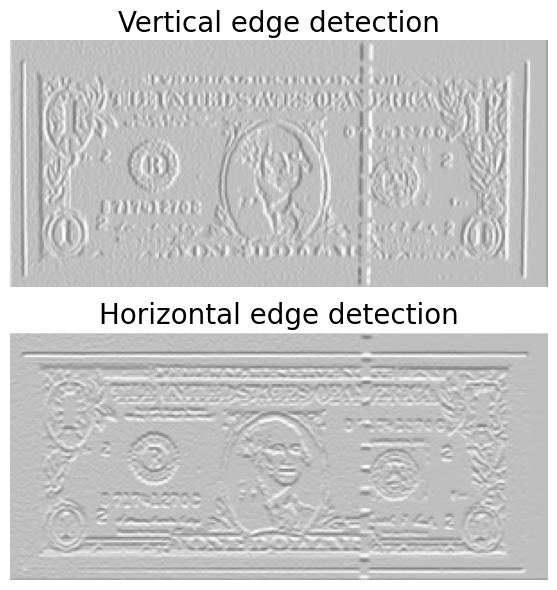

In [125]:
import numpy as np

def imshow(img, ax):
    '''Visualise a feature map after applying torchvision.utils.make_grid to it. 
    
    Inputs:
        img : output from torchvision.utils.make_grid
        ax : Axes object in your plot
    
    '''
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() # Return tensor to numpy array
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

fig, axs = plt.subplots(2,1, figsize = (6, 6), dpi = 100)
    
imshow(torchvision.utils.make_grid(feature_map[0], normalize = True, nrow = 3), axs[0])
imshow(torchvision.utils.make_grid(feature_map[1], normalize = True, nrow = 3), axs[1])
for ax in axs:
    ax.axis('off')

axs[0].set_title('Vertical edge detection',fontsize = 20)
axs[1].set_title('Horizontal edge detection',fontsize = 20)

fig.tight_layout()


Playing around with different kernels and seeing what feature maps are produced.

torch.Size([4, 138, 300])


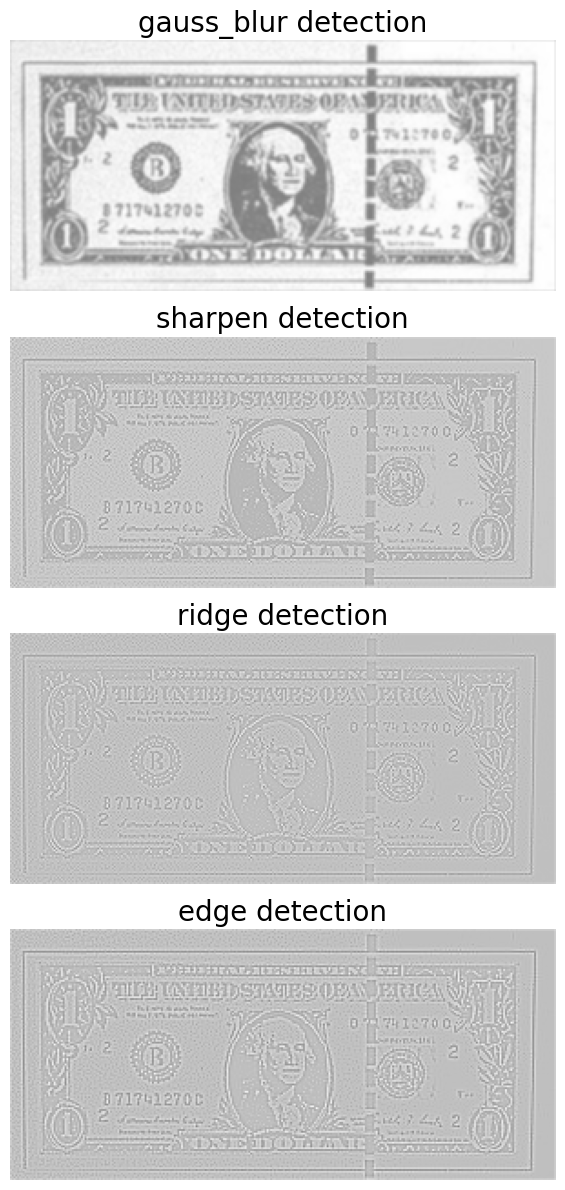

In [126]:


gauss_blur = 1/16 * torch.Tensor([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]]).view(1, 1, 3, 3).repeat(1, 3, 1, 1) 

sharpen = torch.Tensor([[0, -1, 0],
                        [-1, 5, -1],
                        [0, -1, 0]]).view(1, 1, 3, 3).repeat(1, 3, 1, 1) 

ridge = torch.Tensor([[0, -1, 0],
                      [-1, 4, -1],
                      [0, -1, 0]]).view(1, 1, 3, 3).repeat(1, 3, 1, 1) 

edge = torch.Tensor([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]]).view(1, 1, 3, 3).repeat(1, 3, 1, 1)

weights = torch.concat([gauss_blur, sharpen, ridge, edge], axis = 0)

conv_layer = nn.Conv2d(3, 4, kernel_size = 3, padding = 1)

conv_layer.weight = nn.Parameter(weights)

feature_map = conv_layer(transform(img))

print(feature_map.shape)

def imshow(img, ax):
    '''Visualise a feature map after applying torchvision.utils.make_grid to it. 
    
    Inputs:
        img : output from torchvision.utils.make_grid
        ax : Axes object in your plot
    
    '''
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy() # Return tensor to numpy array
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

fig, axs = plt.subplots(4,1, figsize = (12, 12), dpi = 100)
    
imshow(torchvision.utils.make_grid(feature_map[0], normalize = True, nrow = 3), axs[0])
imshow(torchvision.utils.make_grid(feature_map[1], normalize = True, nrow = 3), axs[1])
imshow(torchvision.utils.make_grid(feature_map[2], normalize = True, nrow = 3), axs[2])
imshow(torchvision.utils.make_grid(feature_map[3], normalize = True, nrow = 3), axs[3])

for ax in axs:
    ax.axis('off')

axs[0].set_title('gauss_blur detection',fontsize = 20)
axs[1].set_title('sharpen detection',fontsize = 20)
axs[2].set_title('ridge detection',fontsize = 20)
axs[3].set_title('edge detection',fontsize = 20)

fig.tight_layout()



Using padding for CNNs in PyTorch is straightforward; you can do so either when you apply a convolutional layer, by specifying the padding size with the `padding` argument and specifying the padding mode with `padding_mode`, or by explicitly adding padding layers into your `nn.Sequential`. In general it is easiest to just add it into your convolutional layers. An example of two models that have the same net action is shown in the cell below. We will show they are the same by operating on some random data and showing the result is the same.

In [127]:
# Use manual seeds to ensure kernel initial weights are the same
torch.manual_seed(1)
model_1 = nn.Conv2d(3, 1, (3, 3), stride = 1, padding = 2, padding_mode='zeros')

torch.manual_seed(1)
model_2 = nn.Sequential(nn.ZeroPad2d(2),
                        nn.Conv2d(3, 1, (3, 3), stride = 1))

# Generate random data
torch.manual_seed(1)
example_arr = torch.randn(3, 10, 10)


# Operate each model on the example array and compare to make sure results are the same
print(model_1(example_arr)==model_2(example_arr))

print(model_1)


tensor([[[True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, True,
          True],
         [True, True, True, True, True, True, True, True, True, True, 

Finally, we can define pooling layers using e.g. `nn.MaxPool2d`. You can read about more pooling options in the [documentation](https://pytorch.org/docs/stable/nn.html#pooling-layers). We can therefore put together a whole convolutional neural network using convolutional layers, padding, and max pooling. Because we have pooled using a 2 x 2 kernel, with a stride of 2, we should expect our output dimensions to be half of what they were after the previous model. 

In [128]:
# Fix manual seed to compare with previous models
torch.manual_seed(1)
model_3 = nn.Sequential(nn.Conv2d(3, 1, (3, 3), stride = 1, padding = 2, padding_mode = 'zeros'),
                        nn.MaxPool2d((2, 2), stride = 2))

print('Example array shape: {}'.format(example_arr.shape))
print('Model 1 output shape: {}'.format(model_1(example_arr).shape))
print('Model 2 output shape: {}'.format(model_2(example_arr).shape))
print('Model 3 output shape: {}'.format(model_3(example_arr).shape))

Example array shape: torch.Size([3, 10, 10])
Model 1 output shape: torch.Size([1, 12, 12])
Model 2 output shape: torch.Size([1, 12, 12])
Model 3 output shape: torch.Size([1, 6, 6])


# A convolutional neural network example with Fashion MNIST 

Now that we have the machinery to build a convolutional neural network in PyTorch, we will try training a model on the FashionMNIST dataset. Rather than the binary classification problems we have done in the past, this time we will be trying a multiclass classification problem. The principles for evaluating a model here are applicable to all multiclass classification problems.

We previously flattened images into 1D arrays when we used a standard neural network, we can instead use the full 2D datasets. We will need to do some standard transforms first:

In [129]:
import torchvision
import torch.nn as nn
import torch
from torchvision.datasets import FashionMNIST

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

train_dataset = FashionMNIST(root='Week10_data', train=True, transform=transform, download=True)
train_dataset, validation_dataset = torch.utils.data.random_split(train_dataset, lengths = [0.8, 0.2], generator = torch.Generator().manual_seed(1))

test_dataset = FashionMNIST(root='Week10_data',train = False, transform = transform, download = True)

In [130]:
# A simple model: 

torch.manual_seed(1)

fashion_mnist_model_1 = nn.Sequential(nn.Conv2d(1, 6, 5),
                                      nn.ReLU(),
                                      nn.MaxPool2d(2, 2),
                                      nn.Flatten(start_dim = 1), # Flatten all dimensions but batch
                                      nn.Linear(6 * 12 * 12, 10)) # Size 10 output to give an output for each class

In [131]:
# Define DataLoaders

train_dloader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True, drop_last = True)
val_dloader = torch.utils.data.DataLoader(validation_dataset, batch_size = 64, shuffle = True, drop_last = True)
test_dloader = torch.utils.data.DataLoader(test_dataset, batch_size = 4, shuffle = False, generator = torch.Generator().manual_seed(1))

In [132]:
# Define loss function and optimizer

loss_fcn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.SGD(fashion_mnist_model_1.parameters(), lr = 0.001, momentum = 0.9)

In [133]:
from tqdm import tqdm

def train_epoch(model, optimizer, epoch):
    tot_loss = 0
    valid_loss = 0
    true_preds, count = 0., 0
    model.train()
    for X_train, y_train in tqdm(train_dloader):
        y_pred = model(X_train)
        optimizer.zero_grad()
        loss = loss_fcn(y_pred, y_train)
        tot_loss += loss.detach()
        loss.backward()
        optimizer.step()
        true_preds += (y_pred.argmax(dim = -1)==y_train).sum()
        count += y_train.shape[0]
    train_acc = true_preds/count

    vtrue_preds, vcount = 0., 0
    model.eval()
    for X_valid, y_valid in val_dloader:
        y_pred_v = model(X_valid)
        vloss = loss_fcn(y_pred_v, y_valid)
        valid_loss += vloss.detach()
        vtrue_preds += (y_pred_v.argmax(dim = -1)==y_valid).sum()
        vcount += y_valid.shape[0]
    val_acc = vtrue_preds/vcount

        
    print(f"[Epoch {epoch+1:2d}] Training accuracy: {train_acc*100.0:05.2f}%, Validation accuracy: {val_acc*100.0:05.2f}%")

    
    return tot_loss/len(train_dataset), valid_loss/len(validation_dataset)

In [134]:
for i in range(10):
    train_epoch(fashion_mnist_model_1, optimizer, i)

100%|██████████| 750/750 [00:08<00:00, 92.61it/s]


[Epoch  1] Training accuracy: 82.23%, Validation accuracy: 85.47%


100%|██████████| 750/750 [00:08<00:00, 90.17it/s]


[Epoch  2] Training accuracy: 85.80%, Validation accuracy: 84.84%


100%|██████████| 750/750 [00:08<00:00, 93.48it/s]


[Epoch  3] Training accuracy: 86.47%, Validation accuracy: 86.46%


100%|██████████| 750/750 [00:08<00:00, 92.37it/s]


[Epoch  4] Training accuracy: 86.34%, Validation accuracy: 86.51%


100%|██████████| 750/750 [00:08<00:00, 91.47it/s]


[Epoch  5] Training accuracy: 86.68%, Validation accuracy: 85.50%


100%|██████████| 750/750 [00:08<00:00, 92.50it/s]


[Epoch  6] Training accuracy: 87.48%, Validation accuracy: 86.71%


100%|██████████| 750/750 [00:08<00:00, 91.04it/s]


[Epoch  7] Training accuracy: 87.52%, Validation accuracy: 85.80%


100%|██████████| 750/750 [00:08<00:00, 90.66it/s]


[Epoch  8] Training accuracy: 87.46%, Validation accuracy: 86.63%


100%|██████████| 750/750 [00:08<00:00, 87.20it/s]


[Epoch  9] Training accuracy: 87.65%, Validation accuracy: 86.58%


100%|██████████| 750/750 [00:07<00:00, 93.93it/s]


[Epoch 10] Training accuracy: 87.65%, Validation accuracy: 84.66%


Now that we have trained a model (for 10 epochs), we can quickly evaluate the performance on the test data. We will start by visualising a few images and then making prediction on those points, and then evaluating the test performance on the whole dataset. 

tensor([9, 2, 1, 1])


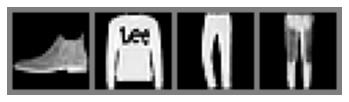

In [135]:
test_iter = iter(test_dloader)
images, labels = next(test_iter)

fig, ax = plt.subplots(1,1)
plt.axis('off')
imshow(torchvision.utils.make_grid(images),ax)

print(labels)

In [136]:
fashion_mnist_model_1.eval()

outputs = fashion_mnist_model_1(images)

print(outputs)

tensor([[ -3.5891,  -6.1466,  -2.8045,  -2.3163,  -6.6125,   4.8416,  -1.8862,
           5.2125,   1.2310,  11.5247],
        [  4.7953,  -4.0158,  16.9535,  -5.6853,   8.6496, -10.2227,  13.5172,
         -13.2490,   0.6701, -12.0887],
        [ -1.9243,  25.4363,  -3.2047,   1.7562,   4.8761,  -3.6753,  -1.6928,
          -7.0933,  -1.9754, -11.1894],
        [ -2.3852,  16.2992,  -3.4410,   1.5370,   2.3516,  -2.0195,  -1.3208,
          -3.7153,  -1.6208,  -5.7578]], grad_fn=<AddmmBackward0>)


For each sample, we output a vector of length 10, where each value corresponds to the "energy" for one of the classes. The higher the energy, the more the network thinks the sample belongs to that class. We can therefore make predictions by selecting the class with the highest entropy, using `torch.argmax`: 

In [137]:
torch.argmax(outputs, dim = -1)

tensor([9, 2, 1, 1])

We can therefore see we have successfully predicted those four points. We can now iterate over the whole training dataset and calculate the total test classification accuracy:

In [138]:
total_correct, total_pred = 0, 0

fashion_mnist_model_1.eval()
with torch.no_grad(): # no need to calculate gradients as we are just evaluating
    for X_batch, y_batch in test_dloader:
        pred = torch.argmax(fashion_mnist_model_1(X_batch), dim = -1)
        total_correct += (pred==y_batch).sum()
        total_pred+=len(y_batch)
        
print('Classification accuracy on test data = {:.2f}%'.format(total_correct/total_pred * 100))

Classification accuracy on test data = 84.83%


We will also try evaluating the performance per-class, to see if there is anywhere we make particular mistakes.

In [139]:
classes = ('t-shirt/top', 'trouser', 'pullover', 'dress',
           'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot')

correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for images, labels in test_dloader:
        outputs = fashion_mnist_model_1(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: t-shirt/top is 75.1 %
Accuracy for class: trouser is 98.0 %
Accuracy for class: pullover is 78.6 %
Accuracy for class: dress is 81.1 %
Accuracy for class: coat  is 76.7 %
Accuracy for class: sandal is 93.3 %
Accuracy for class: shirt is 60.6 %
Accuracy for class: sneaker is 96.7 %
Accuracy for class: bag   is 93.6 %
Accuracy for class: ankle boot is 94.6 %


In [140]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test, preds = [], []
for images, labels in test_dloader:
    y_test.append(labels)
    preds.append(torch.max(fashion_mnist_model_1(images),1)[1])
    
y_test = torch.concat(y_test).flatten()
preds = torch.concat(preds).flatten()

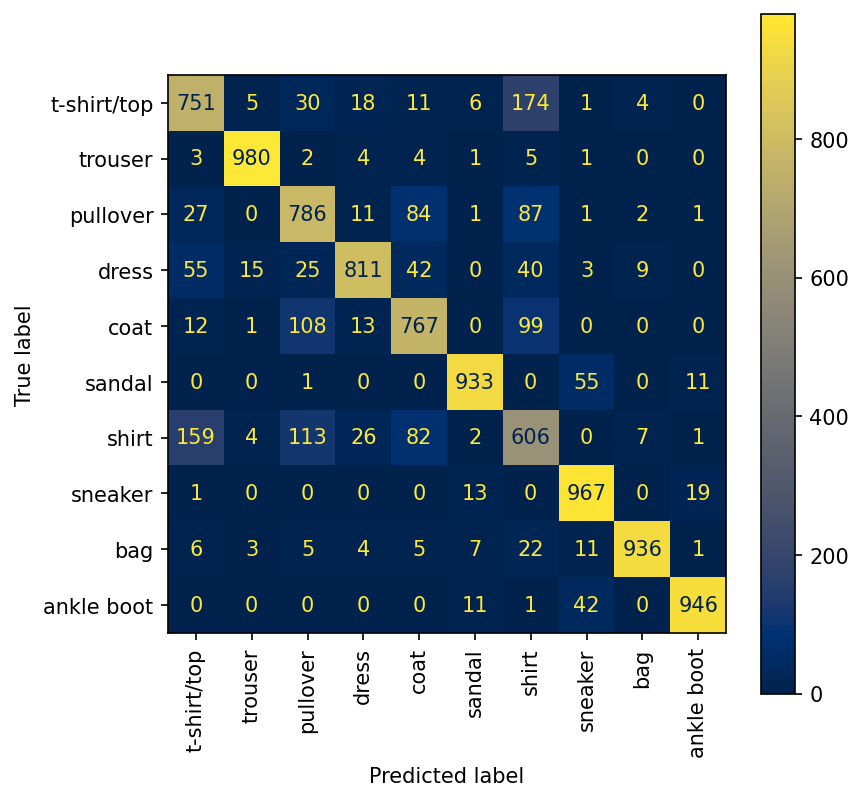

In [141]:
fig, ax = plt.subplots(1,1, figsize = (6,6),dpi = 150)

cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm, display_labels = classes).plot(cmap = plt.cm.cividis, ax = ax, xticks_rotation='vertical')

<div style="background-color:#C2F5DD">

## Example
    
Now that you have seen the process for training and evaluating a convolutional neural network for this dataset, try varying the architecture of the network. In particular, try changing:

* the number of output channels from the first convolutional layer
* the number of convolutional layers
* the number of linear layers at the end of the network
* the choice of type of pooling (e.g. max or average)
    
Make sure every convolutional or linear layer is followed by a ReLU activation function. Use the `CrossEntropyLoss` loss function.
    
Train your model for 2 epochs, then evaluate the following metrics:
    
* total classification accuracy
* confusion matrix
* ROC-AUC scores per class
* ROC curves for each class
    
Save your best performing architecture using `torch.save`. See the [documentation](https://pytorch.org/tutorials/beginner/saving_loading_models.html) for more details.

In [142]:
# Define model

torch.manual_seed(1)

import torch.nn.functional as F

def create_custom_model(num_input_channels, num_output_channels, num_conv_layers, num_linear_layers, pooling_type='max'):
    layers = []
    
    # Add the first convolutional layer
    layers.append(nn.Conv2d(num_input_channels, num_output_channels, kernel_size=5))
    layers.append(nn.ReLU())
    
    # Add pooling layer based on the provided type
    if pooling_type == 'max':
        layers.append(nn.MaxPool2d(2, 2))
    elif pooling_type == 'average':
        layers.append(nn.AvgPool2d(2, 2))
    
    # Add remaining convolutional layers
    for _ in range(num_conv_layers - 1):
        layers.append(nn.Conv2d(num_output_channels, num_output_channels, kernel_size=5))
        layers.append(nn.ReLU())
        if pooling_type == 'max':
            layers.append(nn.MaxPool2d(2, 2))
        elif pooling_type == 'average':
            layers.append(nn.AvgPool2d(2, 2))
    
    # Add flatten layer
    layers.append(nn.Flatten(start_dim=1))
    
    # Calculate the input size for the linear layers
    input_size = num_output_channels * 12 * 12  # Assuming input image size of 28x28 and 2x2 pooling
    
    # Add linear layers
    for _ in range(num_linear_layers - 1):
        layers.append(nn.Linear(input_size, input_size // 2))
        layers.append(nn.ReLU())
        input_size //= 2
    
    # Add final linear layer
    layers.append(nn.Linear(input_size, 10))  # Assuming output size of 10 for Fashion MNIST
    
    return nn.Sequential(*layers)


fashion_mnist_model_1 = create_custom_model(num_input_channels=1, 
                                            num_output_channels=6, 
                                            num_conv_layers=1, 
                                            num_linear_layers=1, 
                                            pooling_type='max')

fashion_mnist_model_2 = create_custom_model(num_input_channels=1, 
                                            num_output_channels=10, 
                                            num_conv_layers=1, 
                                            num_linear_layers=1, 
                                            pooling_type='average')

fashion_mnist_model_3 = create_custom_model(num_input_channels=1, 
                                            num_output_channels=20, 
                                            num_conv_layers=1, 
                                            num_linear_layers=1, 
                                            pooling_type='average')

fashion_mnist_models = [fashion_mnist_model_1,fashion_mnist_model_2,fashion_mnist_model_3]


train_dloader = torch.utils.data.DataLoader(train_dataset, batch_size = 64, shuffle = True, drop_last = True)
val_dloader = torch.utils.data.DataLoader(validation_dataset, batch_size = 64, shuffle = True, drop_last = True)
test_dloader = torch.utils.data.DataLoader(test_dataset, batch_size = 4, shuffle = False, generator = torch.Generator().manual_seed(1))

loss_fcn = nn.CrossEntropyLoss(reduction='sum')
optimizer = torch.optim.SGD(fashion_mnist_model_1.parameters(), lr = 0.001, momentum = 0.9)

from tqdm import tqdm

def train_epoch(model, optimizer, epoch):
    tot_loss = 0
    valid_loss = 0
    true_preds, count = 0., 0
    model.train()
    for X_train, y_train in tqdm(train_dloader):
        y_pred = model(X_train)
        optimizer.zero_grad()
        loss = loss_fcn(y_pred, y_train)
        tot_loss += loss.detach()
        loss.backward()
        optimizer.step()
        true_preds += (y_pred.argmax(dim = -1)==y_train).sum()
        count += y_train.shape[0]
    train_acc = true_preds/count

    vtrue_preds, vcount = 0., 0
    model.eval()
    for X_valid, y_valid in val_dloader:
        y_pred_v = model(X_valid)
        vloss = loss_fcn(y_pred_v, y_valid)
        valid_loss += vloss.detach()
        vtrue_preds += (y_pred_v.argmax(dim = -1)==y_valid).sum()
        vcount += y_valid.shape[0]
    val_acc = vtrue_preds/vcount

        
    print(f"[Epoch {epoch+1:2d}] Training accuracy: {train_acc*100.0:05.2f}%, Validation accuracy: {val_acc*100.0:05.2f}%")

    
    return tot_loss/len(train_dataset), valid_loss/len(validation_dataset)


for model in fashion_mnist_models:
    for i in range(2):
        train_epoch(model, optimizer, i)

100%|██████████| 750/750 [00:08<00:00, 93.38it/s]


[Epoch  1] Training accuracy: 82.25%, Validation accuracy: 84.94%


100%|██████████| 750/750 [00:07<00:00, 95.23it/s]


[Epoch  2] Training accuracy: 85.25%, Validation accuracy: 85.65%


100%|██████████| 750/750 [00:08<00:00, 86.21it/s]


[Epoch  1] Training accuracy: 07.86%, Validation accuracy: 08.17%


100%|██████████| 750/750 [00:08<00:00, 87.05it/s]


[Epoch  2] Training accuracy: 07.86%, Validation accuracy: 08.16%


100%|██████████| 750/750 [00:10<00:00, 70.11it/s]


[Epoch  1] Training accuracy: 10.76%, Validation accuracy: 10.24%


100%|██████████| 750/750 [00:10<00:00, 70.89it/s]


[Epoch  2] Training accuracy: 10.76%, Validation accuracy: 10.24%


# Using the Mnist Digit Dataset to explain a CNN in greater detail: 

In [143]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load and Prepocess data: 

In [144]:

# Define transformations for the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [145]:
import torch
import torch.nn as nn

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(5408, 50)  # Match flattened size
        self.fc2 = nn.Linear(50, 10)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        #print(f"Input shape: {x.shape}")
        x = self.relu(self.conv1(x))
        #print(f"After conv1: {x.shape}")
        x = self.pool(x)
        #print(f"After pooling: {x.shape}")
        x = x.view(x.size(0), -1)  # Flatten the tensor
        #print(f"After flattening: {x.shape}")
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    
def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    # Disable gradient computation for faster testing
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")
    return accuracy

In [146]:
# Instantiate the model
model = CNN()

# Dummy input (batch size: 64, channels: 1, height: 28, width: 28)
dummy_input = torch.randn(64, 1, 28, 28)

# Forward pass
output = model(dummy_input)


In [147]:
# defn. loss and optimizer: 

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [148]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader)}")

Epoch 1/5, Loss: 0.23067731073777528
Epoch 2/5, Loss: 0.07970072848445325
Epoch 3/5, Loss: 0.05728969706206529
Epoch 4/5, Loss: 0.04519552614741913
Epoch 5/5, Loss: 0.036325009963311346


In [149]:
# Evaluate the model
test_accuracy = test_model(model, test_loader)

Accuracy on the test set: 98.35%


# Summary of Formulas for Output Size in CNN Layers

| **Operation**      | **Formula for Output Size**                                                                 |
|---------------------|---------------------------------------------------------------------------------------------|
| **Convolution**     | $$ \text{Output size (H or W)} = \left\lfloor \frac{\text{Input size} - \text{Kernel size} + 2 \cdot \text{Padding}}{\text{Stride}} \right\rfloor + 1 $$ |
| **Pooling**         | $$ \text{Output size (H or W)} = \left\lfloor \frac{\text{Input size}}{\text{Pool size}} \right\rfloor $$                                                    |
| **Flattening**      | $$ \text{Flattened size} = \text{Channels} \times \text{Height} \times \text{Width} $$                                                             |

### Explanation of Parameters:
1. **Input Size (H/W)**: The height and width of the input feature map.
2. **Kernel Size**: The size of the filter (e.g., `3x3` or `5x5`).
3. **Stride**: The step size for sliding the kernel or pooling window.
4. **Padding**: Additional border added around the input to control output dimensions.
5. **Pool Size**: The size of the pooling window (e.g., `2x2`).

### Example:
- For a convolution with:
  - Input size = `28x28`
  - Kernel size = `3x3`
  - Stride = `1`
  - Padding = `1`

$$
\text{Output size} = \left\lfloor \frac{28 - 3 + 2 \cdot 1}{1} \right\rfloor + 1 = 28
$$



# Explanation: Why the Fully Connected Layer has 5408 Neurons

The fully connected layer's input size is determined by the flattened size of the feature map after the convolutional and pooling layers. Let’s calculate this step by step using the formulas for **Convolution** and **Pooling**.

---

## Step 1: Input Dimensions
- The input to the network is an MNIST image with dimensions:
  $ \text{Input size (H x W)} = 28 \times 28 $
- Number of input channels:
  $ \text{Channels} = 1 $

---

## Step 2: Convolutional Layer (`conv1`)
The first convolutional layer has the following parameters:
- Kernel size: $ 3 \times 3 $
- Stride: $ 1 $
- Padding: $ 0 $ (no padding)
- Number of output channels: $ 32 $

### Formula for Output Size:
$$
\text{Output size (H/W)} = \left\lfloor \frac{\text{Input size} - \text{Kernel size} + 2 \cdot \text{Padding}}{\text{Stride}} \right\rfloor + 1
$$

Substitute the values:
$$
\text{Output size (H/W)} = \left\lfloor \frac{28 - 3 + 2 \cdot 0}{1} \right\rfloor + 1 = 26
$$

- After `conv1`, the output feature map has dimensions:
  $$
  \text{Feature map size} = 32 \times 26 \times 26
  $$

---

## Step 3: Pooling Layer (`pool`)
The pooling layer has the following parameters:
- Pool size: $ 2 \times 2 $
- Stride: $ 2 $

### Formula for Output Size:
$$
\text{Output size (H/W)} = \left\lfloor \frac{\text{Input size}}{\text{Pool size}} \right\rfloor
$$

Substitute the values:
$$
\text{Output size (H/W)} = \left\lfloor \frac{26}{2} \right\rfloor = 13
$$

- After the pooling layer, the output feature map has dimensions:
  $$
  \text{Feature map size} = 32 \times 13 \times 13
  $$

---

## Step 4: Flattening the Tensor
Before passing the output of the pooling layer to the fully connected layer, the tensor is flattened into a 1D vector. The flattened size is calculated as:

### Formula for Flattened Size:
$$
\text{Flattened size} = \text{Channels} \times \text{Height} \times \text{Width}
$$

Substitute the values:
$$
\text{Flattened size} = 32 \times 13 \times 13 = 5408
$$

Thus, the input size to the fully connected layer (`fc1`) is:
$$
5408 \, \text{neurons}.
$$

---

## Step 5: Fully Connected Layer
The first fully connected layer (`fc1`) is defined as:
$$
\text{fc1} = \text{nn.Linear(5408, 50)}
$$

- **Input size:** $ 5408 $ (calculated from the flattened tensor).
- **Output size:** $ 50 $ (number of neurons in this layer).

---

### Summary
The fully connected layer has 5408 input neurons because the convolutional and pooling operations reduce the spatial size of the feature map to $ 32 \times 13 \times 13 $, and this is flattened into a vector with $ 5408 $ elements.


In [150]:
import torch
import torch.nn as nn

class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()
        
        # First Convolutional Block: Conv2D -> ReLU -> MaxPool
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second Convolutional Block: Conv2D -> ReLU -> MaxPool
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Third Convolutional Block: Conv2D -> ReLU
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        
        self.fc1 = nn.Linear(128 * 7 * 7, 256)  # 7x7 comes from the spatial reduction
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        
        x = self.pool1(self.relu(self.conv1(x)))
        x = self.pool2(self.relu(self.conv2(x)))
        x = self.relu(self.conv3(x))
        
        # Flatten the tensor
        x = x.view(x.size(0), -1)  # Flatten to [batch_size, 128*7*7]
        
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x


In [151]:
model = ComplexCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [152]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader)}")

Epoch 1/5, Loss: 0.15063741456197605
Epoch 2/5, Loss: 0.042043658540654144
Epoch 3/5, Loss: 0.029726169125866182
Epoch 4/5, Loss: 0.02289305392113088
Epoch 5/5, Loss: 0.02068289746129168


# Experimenting with the Cifar 10 Dataset: 

# Does the Number of Input Channels Affect the Output Size?

The **number of input channels** does not directly affect the **spatial output size (height and width)** of the feature map in a convolutional or pooling layer. However, it does influence the **number of learnable parameters** and the way the convolution operation is applied.

---

## How the Number of Input Channels Works in Convolutions

1. **Multiple Input Channels**:
   - In a convolutional layer, each filter operates across all input channels.
   - The spatial dimensions of the input are unaffected by the number of input channels.
   - The convolution process combines all input channels for a single output channel.

2. **Output Channels**:
   - The number of output channels is defined by the number of filters in the convolutional layer.
   - Each filter produces one output channel.

---

## Why Input Channels Do Not Change Output Size

The spatial output size of a convolutional layer is determined by:
1. **Input Height and Width (H/W)**
2. **Kernel Size**
3. **Stride**
4. **Padding**

### Formula for Spatial Output Size:
$$
\text{Output size (H/W)} = \left\lfloor \frac{\text{Input size} - \text{Kernel size} + 2 \cdot \text{Padding}}{\text{Stride}} \right\rfloor + 1
$$

The **number of input channels** does not appear in this formula, so it does not affect the height and width of the output feature map.

---

## Example with CIFAR-10 Data

For the CIFAR-10 dataset:
- Input dimensions: \(32 \times 32 \times 3\) (3 channels for RGB).
- Example convolutional layer:
  ```python
  conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
    
# Explanation of Input Channels, Output Size, and Parameters

## Convolutional Layer Example

### Given Parameters:
- **Number of Input Channels:** 3 (RGB).
- **Number of Output Channels:** 32 (defined by the number of filters).
- **Kernel Size:** $3 \times 3$.
- **Stride:** 1.
- **Padding:** 1.

---

## Output Size Calculation

### Formula for Output Size:
$$
\text{Output size (H/W)} = \left\lfloor \frac{\text{Input size} - \text{Kernel size} + 2 \cdot \text{Padding}}{\text{Stride}} \right\rfloor + 1
$$

### Substituting the values:
$$
\text{Output size} = \left\lfloor \frac{32 - 3 + 2 \cdot 1}{1} \right\rfloor + 1 = 32
$$

### Result:
The output dimensions are $32 \times 32 \times 32$ (32 output channels, same height and width).

---

## How the Number of Input Channels Affects Parameters

The **number of learnable parameters** in a convolutional layer **does depend on the number of input channels**.

### Formula for Parameters in a Convolutional Layer:
$$
\text{Parameters} = \text{Output channels} \times (\text{Kernel size}^2 \times \text{Input channels}) + \text{Output channels (bias terms)}
$$

### Example:
For `conv1` with:
- **Input channels:** 3
- **Output channels:** 32
- **Kernel size:** $3 \times 3$

#### Substituting the values:
$$
\text{Parameters} = 32 \times (3 \times 3 \times 3) + 32 = 896
$$

---

## Impact of Increasing Input Channels

If the input channels increased (e.g., from 3 to 5), the parameters would increase proportionally. 

For example:
- $32 \times (3 \times 3 \times 5) + 32 = 1,472$ parameters.

---

## Summary

### Spatial Output Size (H/W):
- Does **not** depend on the number of input channels.
- Determined by:
  - Kernel size
  - Stride
  - Padding
  - Input spatial dimensions.

### Number of Parameters:
- **Directly influenced** by the number of input channels.
- More input channels mean more parameters to learn.



In [153]:

import torch
import torch.nn as nn

class CNN_cifar(nn.Module):
    def __init__(self):
        super(CNN_cifar, self).__init__()
        
        # First Convolutional Block: Conv2D -> ReLU -> MaxPool
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Second Convolutional Block: Conv2D -> ReLU -> MaxPool
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Third Convolutional Block: Conv2D -> ReLU
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        
        self.fc1 = nn.Linear(128*8*8, 256)  
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)   
        self.relu = nn.ReLU()
    
    def forward(self, x):
        
        x = self.pool1(self.relu(self.conv1(x)))  
        x = self.pool2(self.relu(self.conv2(x)))  
        x = self.relu(self.conv3(x))

        x = x.view(x.size(0), -1)  # Flatten to [batch_size, 128*4*4]
        
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x
    
def calculate_fc1_input_size(input_size, conv_layers):
    """
    Calculate the number of neurons in the first fully connected layer (FC1) 
    after a series of convolutional and pooling layers.

    Parameters:
        input_size (tuple): Input dimensions as (channels, height, width).
        conv_layers (list): List of convolutional/pooling layers in order of application.

    Returns:
        int: Number of neurons in the flattened tensor after the last convolutional/pooling layer.
    """
    channels, height, width = input_size

    for layer in conv_layers:
        if isinstance(layer, nn.Conv2d):
            kernel_size = layer.kernel_size[0]  # Assuming square kernels
            stride = layer.stride[0]
            padding = layer.padding[0]
            height = (height - kernel_size + 2 * padding) // stride + 1
            width = (width - kernel_size + 2 * padding) // stride + 1
            channels = layer.out_channels  # Update number of channels
        elif isinstance(layer, nn.MaxPool2d):
            kernel_size = layer.kernel_size
            stride = layer.stride
            height = height // stride
            width = width // stride

    flattened_size = channels * height * width
    return flattened_size


def test_model(model, test_loader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    
    # Disable gradient computation for faster testing
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * correct / total
    print(f"Accuracy on the test set: {accuracy:.2f}%")
    return accuracy


conv_layers = [
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
]

input_size = (3, 32, 32)

fc1_input_size = calculate_fc1_input_size(input_size, conv_layers)
print(f"Number of neurons in FC1: {fc1_input_size}")

Number of neurons in FC1: 8192


In [154]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize RGB channels
])

train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [155]:
model = CNN_cifar()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [156]:
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute loss
        loss = criterion(outputs, labels)
        
        # Backward pass
        loss.backward()
        
        # Update weights
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {running_loss / len(train_loader)}")

Epoch 1/5, Loss: 1.403233557405984
Epoch 2/5, Loss: 0.930990678193929
Epoch 3/5, Loss: 0.7205638443798665
Epoch 4/5, Loss: 0.5668039032641579
Epoch 5/5, Loss: 0.43005858199751895


# RNN

1) Unrolled vs Rolled diagram

2) Look at mathematical examples...

3) look at cell

4) output + hidden states

5) Types of RNNS:

    + Sequence to sequence (Price Forecasting)
    + Sequence to Vector (Scam or not) 
    + Vector to sequence (Image Captioning)
    + Encoder - Decoder (Translation) 
    
    + Give graphical example of each...

In [ ]:
# Coding an RNN (pytorch)

# Coding a vanilla RNN (many-one for a problem such as stock price prediction):

In [157]:
class VanillaRNN:
    
    def __init__(self, input_features, time_steps,  num_hidden_units, output_size): 
        
        self.input_features = input_features
        self.time_steps = time_steps
        self.num_hidden_units = num_hidden_units
        self.output_size = output_size
        
        # Xavier initialization (wont use to begin with)
        fan_in = input_features  # Number of input units
        fan_out = num_hidden_units  # Number of output units for each layer 
        
        self.X = np.zeros((time_steps, input_features))
        self.h = np.zeros((time_steps, num_hidden_units))
        
        # Random Initialisation (Most Simple)
        self.W_x = np.random.randn(num_hidden_units, input_features) * 0.01 
        self.W_h = np.random.randn(num_hidden_units, num_hidden_units) * 0.01
        self.W_y = np.random.randn(output_size, num_hidden_units) * 0.01
        
        # Biases initialized to zero
        self.b_h = np.zeros((num_hidden_units, 1))  # Hidden layer bias
        self.b_y = np.zeros((output_size, 1))  # Output layer bias
        
        # Xavier initialization
#         self.W_x = np.random.randn(num_hidden_units, input_features) * np.sqrt(1 / fan_in)  # Input-to-hidden weights
#         self.W_h = np.random.randn(num_hidden_units, input_features) * np.sqrt(1 / num_hidden_units)  # Hidden-to-hidden weights
#         self.W_y = np.random.randn(output_size, num_hidden_units) * np.sqrt(1 / num_hidden_units)  # Hidden-to-output weights
        
        # Initial hidden state
        self.h_0 = np.zeros((num_hidden_units, 1))  
        
        
    def forward(self, x):
        
        assert x.shape == self.X.shape, f"Input shape {x.shape} does not match expected shape {self.X.shape}"
        
        # initialise first hidden state for iterative forward prop: 
        h_t = self.h_0
        
        for t in range(self.time_steps):
            x_t = x[t].reshape(-1,1)
            h_t = np.tanh(np.dot(self.W_x, x_t) + np.dot(self.W_h, h_t) + self.b_h)
            
            self.h[t] = h_t.T # Store hidden state (transpose to align with self.h shape)
            
        y_hat = np.dot(self.W_y, h_t) + self.b_y  
            
        return y_hat
    
    def backward(self, x, y, y_hat, learning_rate):
        error = y_hat - y  # Output error

        dW_y = np.dot(error, self.h[-1].reshape(1, -1)) 
        db_y = error  

      
        dW_x = np.zeros_like(self.W_x)
        dW_h = np.zeros_like(self.W_h)
        db_h = np.zeros_like(self.b_h)

        dh_next = np.dot(self.W_y.T, error)  # Gradient from output to last hidden state

        for t in reversed(range(self.time_steps)):
            dh = dh_next
            dh_raw = dh * (1 - self.h[t]**2)  # Derivative of tanh
            dh_raw = dh_raw.reshape(-1, 1)  # Ensure column vector

            # Update gradients
            dW_x += np.dot(dh_raw, x[t].reshape(1, -1))
            dW_h += np.dot(dh_raw, self.h[t - 1].reshape(1, -1) if t > 0 else self.h_0.T)
            db_h += dh_raw

            # Backpropagate to previous hidden state
            dh_next = np.dot(self.W_h.T, dh_raw)

        # Update parameters
        self.W_x -= learning_rate * dW_x
        self.W_h -= learning_rate * dW_h
        self.W_y -= learning_rate * dW_y
        self.b_h -= learning_rate * db_h
        self.b_y -= learning_rate * db_y
    

In [158]:
# Parameters
time_steps = 10  
input_features = 3  
num_hidden_units = 16  
output_size = 1  
learning_rate = 0.01

# Generate random input data (sequence)
x_mock = np.random.randn(time_steps, input_features)

# Ground truth output: Sum of all elements in the sequence
y_mock = np.array([[np.sum(x_mock)]]) 

In [159]:
rnn = VanillaRNN(input_features, time_steps, num_hidden_units, output_size)

y_pred = rnn.forward(x_mock)
print("Predicted Output:", y_pred)
print("Ground Truth Output:", y_mock)



Predicted Output: [[-7.35977082e-05]]
Ground Truth Output: [[-5.64440688]]


In [160]:
rnn.backward(x_mock, y_mock, y_pred, learning_rate)

ValueError: operands could not be broadcast together with shapes (16,3) (256,3) (16,3) 

In [ ]:
y_pred = rnn.forward(x_mock)
print("Predicted Output:", y_pred)
print("Ground Truth Output:", y_mock)

In [ ]:
# Perform backpropagation and update weights
rnn.backward(x_mock, y_mock, y_pred, learning_rate)

# Coding a Vanilla RNN (Many-Many): 
    


In [ ]:
import numpy as np

class VanillaEncoderRNN:
    def __init__(self, input_dim, hidden_dim):
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        # Initialize weights and biases
        self.W_xh = np.random.randn(hidden_dim, input_dim) * 0.01  # Input to hidden weights
        self.W_hh = np.random.randn(hidden_dim, hidden_dim) * 0.01  # Hidden to hidden weights
        self.b_h = np.zeros((hidden_dim, 1))  # Hidden state bias

    def forward(self, input_sequence):
        T = len(input_sequence)  # Length of the input sequence
        h = np.zeros((self.hidden_dim, 1))  # Initialize hidden state
        hidden_states = []

        # Process each time step
        for t in range(T):
            x_t = input_sequence[t].reshape(-1, 1)  # Ensure column vector
            h = np.tanh(np.dot(self.W_xh, x_t) + np.dot(self.W_hh, h) + self.b_h)
            hidden_states.append(h)

        return hidden_states  # Return all hidden states


In [ ]:
class VanillaDecoderRNN:
    def __init__(self, hidden_dim, output_dim):
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim

        # Initialize weights and biases
        self.W_hy = np.random.randn(output_dim, hidden_dim) * 0.01  
        self.b_y = np.zeros((output_dim, 1)) 

    def forward(self, hidden_states, target_sequence):
        T = len(target_sequence)  
        outputs = []

       
        for t in range(T):
            h_t = hidden_states[t]  # Hidden state from encoder
            y_t = self.softmax(np.dot(self.W_hy, h_t) + self.b_y)
            outputs.append(y_t)

        return outputs

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0, keepdims=True)
        

In [ ]:
class SequenceToSequenceRNN:
    def __init__(self, input_dim, hidden_dim, output_dim):
        self.encoder = VanillaEncoderRNN(input_dim, hidden_dim)
        self.decoder = VanillaDecoderRNN(hidden_dim, output_dim)

    def train(self, input_sequence, target_sequence, lr=0.01, epochs=100):
        for epoch in range(epochs):
            # Forward pass
            encoder_hidden_states = self.encoder.forward(input_sequence)
            decoder_outputs = self.decoder.forward(encoder_hidden_states, target_sequence)

            
            loss = 0
            gradients = {'W_xh': 0, 'W_hh': 0, 'W_hy': 0, 'b_h': 0, 'b_y': 0}
            for t, (y_pred, y_true) in enumerate(zip(decoder_outputs, target_sequence)):
                y_true_one_hot = np.zeros_like(y_pred)
                y_true_one_hot[y_true] = 1
                loss += -np.sum(y_true_one_hot * np.log(y_pred))

                # Backpropagation
                d_y = y_pred - y_true_one_hot
                gradients['W_hy'] += np.dot(d_y, encoder_hidden_states[t].T)
                gradients['b_y'] += d_y

            # Average loss
            loss /= len(target_sequence)

            # Update parameters (simplified gradient descent)
            self.encoder.W_xh -= lr * gradients['W_xh']
            self.encoder.W_hh -= lr * gradients['W_hh']
            self.decoder.W_hy -= lr * gradients['W_hy']
            self.encoder.b_h -= lr * gradients['b_h']
            self.decoder.b_y -= lr * gradients['b_y']

            if epoch % 10 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

In [ ]:

input_sequence = [np.random.randn(4) for _ in range(5)]  
target_sequence = [0, 1, 2, 3, 4] 

# Model parameters
input_dim = 4  
hidden_dim = 8  
output_dim = 5  


model = SequenceToSequenceRNN(input_dim, hidden_dim, output_dim)


model.train(input_sequence, target_sequence, lr=0.01, epochs=100)

# Image Classification Tutorial: 

In [172]:
import torch
import torch.nn as nn
import torch.nn.functional as F


def calculate_fc1_input_size(input_size, conv_layers):
    """
    Calculate the number of neurons in the first fully connected layer (FC1) 
    after a series of convolutional and pooling layers.

    Parameters:
        input_size (tuple): Input dimensions as (channels, height, width).
        conv_layers (list): List of convolutional/pooling layers in order of application.

    Returns:
        int: Number of neurons in the flattened tensor after the last convolutional/pooling layer.
    """
    channels, height, width = input_size

    for layer in conv_layers:
        if isinstance(layer, nn.Conv2d):
            kernel_size = layer.kernel_size[0]  # Assuming square kernels
            stride = layer.stride[0]
            padding = layer.padding[0]
            height = (height - kernel_size + 2 * padding) // stride + 1
            width = (width - kernel_size + 2 * padding) // stride + 1
            channels = layer.out_channels  # Update number of channels
        elif isinstance(layer, nn.MaxPool2d):
            kernel_size = layer.kernel_size
            stride = layer.stride
            height = height // stride
            width = width // stride

    flattened_size = channels * height * width
    return flattened_size


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

SyntaxError: invalid syntax (<ipython-input-172-fcd7adecdbc5>, line 41)

In [175]:

conv_layers = [
    nn.Conv2d(3, 6, 5),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6, 16, 5),
    nn.MaxPool2d(2, 2)
]

input_size = (3, 32, 32)

fc1 = calculate_fc1_input_size(input_size, conv_layers)

print(fc1)

400


## Training: 

In [164]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
from PIL import Image

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 20
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# example images
dataiter = iter(trainloader)
images, labels = next(dataiter) # note: for pytorch versions (<1.14) use dataiter.next()

im = Image.fromarray((torch.cat(images.split(1,0),3).squeeze()/2*255+.5*255).permute(1,2,0).numpy().astype('uint8'))
im.save("train_pt_images.jpg")
print('train_pt_images.jpg saved.')
print('Ground truth labels:' + ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


## cnn
net = Net()


## loss and optimiser
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


## train
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Training done.')

# save trained model
torch.save(net.state_dict(), 'saved_model.pt')
print('Model saved.')

Files already downloaded and verified
train_pt_images.jpg saved.
Ground truth labels:  car truck  frog  ship   dog   car   dog   cat   dog truck  ship   cat  bird horse horse  deer horse  deer  frog   cat
[1,  2000] loss: 2.167
[2,  2000] loss: 1.658
[3,  2000] loss: 1.486
[4,  2000] loss: 1.370
[5,  2000] loss: 1.274
Training done.
Model saved.


## Testing: 

In [165]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image


transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)
dataiter = iter(testloader)
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


## load the trained model
model = net

## inference
images, labels = next(dataiter)
print('Ground-truth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = model(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

# save to images
im = Image.fromarray((torch.cat(images.split(1,0),3).squeeze()/2*255+.5*255).permute(1,2,0).numpy().astype('uint8'))
im.save("test_pt_images.jpg")
print('test_pt_images.jpg saved.')

Files already downloaded and verified
Ground-truth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship
test_pt_images.jpg saved.
